# Predictive Modelling of Bio-Char Yield%, SSA, HHV

In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
#Data processing functions
from sklearn.model_selection import train_test_split
#Regressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_excel('MTP_sample_data 1.xlsx')

In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,BIO-CHAR,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,biomass type,C (%),H (%),N (%),O (%),VM (%),Ash (%),FC (%),T (°C),RT (min),HR (°C/min),N-char (%),Yield-char (%),SSA-char (m2/g),HHV (MJ/KG)
1,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,350,180,1.944444,5.12,NaN,2.567,14.309531
2,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,450,180,2.5,2.01,NaN,45.68,14.309531
3,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,550,180,3.055556,0.55,NaN,221,14.309531
4,marine macroalgae,39.784946,6.353861,5.404273,48.456919,NaN,24.51,NaN,200,120,1.666667,5.235602,78.34,1.909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,60,5,0.28319,36.082474,14.95,18.196395
116,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,15,10,0.536959,38.659794,12.35,18.196395
117,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,30,10,0.355342,37.628866,13.45,18.196395
118,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,300,60,10,0.316491,57.216,7.12,18.196395


In [4]:
a=['biomass type','C (%)','H (%)','N (%)','O (%)','VM (%)','Ash (%)','FC (%)','T (°C)','RT (min)','HR (°C/min)','N-char (%)','Yield-char (%)','SSA-char (m2/g)','HHV (MJ/KG)']

In [5]:
df.columns=a

In [6]:
df=df[1:]

In [7]:
df

,biomass type,C (%),H (%),N (%),O (%),VM (%),Ash (%),FC (%),T (°C),RT (min),HR (°C/min),N-char (%),Yield-char (%),SSA-char (m2/g),HHV (MJ/KG)
1,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,350,180,1.944444,5.12,NaN,2.567,14.309531
2,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,450,180,2.5,2.01,NaN,45.68,14.309531
3,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,550,180,3.055556,0.55,NaN,221,14.309531
4,marine macroalgae,39.784946,6.353861,5.404273,48.456919,NaN,24.51,NaN,200,120,1.666667,5.235602,78.34,1.909,0
5,marine macroalgae,39.784946,6.353861,5.404273,48.456919,NaN,24.51,NaN,400,120,3.333333,4.740771,63.64,70.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,60,5,0.28319,36.082474,14.95,18.196395
116,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,15,10,0.536959,38.659794,12.35,18.196395
117,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,30,10,0.355342,37.628866,13.45,18.196395
118,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,300,60,10,0.316491,57.216,7.12,18.196395


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 1 to 119
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   biomass type     119 non-null    object
 1   C (%)            119 non-null    object
 2   H (%)            119 non-null    object
 3   N (%)            119 non-null    object
 4   O (%)            119 non-null    object
 5   VM (%)           86 non-null     object
 6   Ash (%)          113 non-null    object
 7   FC (%)           86 non-null     object
 8   T (°C)           119 non-null    object
 9   RT (min)         119 non-null    object
 10  HR (°C/min)      119 non-null    object
 11  N-char (%)       94 non-null     object
 12  Yield-char (%)   92 non-null     object
 13  SSA-char (m2/g)  102 non-null    object
 14  HHV (MJ/KG)      119 non-null    object
dtypes: object(15)
memory usage: 14.1+ KB


In [9]:
df1=df[['C (%)','H (%)','N (%)','O (%)','VM (%)','Ash (%)','FC (%)','T (°C)','RT (min)','HR (°C/min)','N-char (%)','Yield-char (%)','SSA-char (m2/g)','HHV (MJ/KG)']].astype(float)
df2=pd.DataFrame(df['biomass type'])
df=pd.concat([df2,df1],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 1 to 119
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   biomass type     119 non-null    object 
 1   C (%)            119 non-null    float64
 2   H (%)            119 non-null    float64
 3   N (%)            119 non-null    float64
 4   O (%)            119 non-null    float64
 5   VM (%)           86 non-null     float64
 6   Ash (%)          113 non-null    float64
 7   FC (%)           86 non-null     float64
 8   T (°C)           119 non-null    float64
 9   RT (min)         119 non-null    float64
 10  HR (°C/min)      119 non-null    float64
 11  N-char (%)       94 non-null     float64
 12  Yield-char (%)   92 non-null     float64
 13  SSA-char (m2/g)  102 non-null    float64
 14  HHV (MJ/KG)      119 non-null    float64
dtypes: float64(14), object(1)
memory usage: 14.1+ KB


In [11]:
df.describe()

,C (%),H (%),N (%),O (%),VM (%),Ash (%),FC (%),T (°C),RT (min),HR (°C/min),N-char (%),Yield-char (%),SSA-char (m2/g),HHV (MJ/KG)
count,119.000000,119.000000,119.000000,119.000000,86.000000,113.000000,86.000000,119.000000,119.000000,119.000000,94.000000,92.000000,102.000000,119.000000
mean,47.584303,6.735472,2.550053,42.795072,73.349360,12.608699,15.354668,494.957983,86.092437,9.828992,3.165421,39.631564,63.615954,11.593702
std,4.718941,1.721371,2.217384,5.237327,9.649110,10.990883,6.962399,144.591030,74.441877,7.455507,2.464779,13.343853,95.630182,7.493723
min,33.770000,3.419763,0.050005,28.106974,49.357766,0.438596,3.366013,200.000000,10.000000,1.000000,0.150060,18.800000,0.394800,0.000000
25%,45.414365,5.980000,0.855943,40.263797,67.780000,3.760000,8.800000,400.000000,60.000000,6.250000,0.907508,29.415000,4.417500,0.000000
50%,47.600000,6.329273,1.622249,43.867403,76.122673,10.020831,16.610000,500.000000,60.000000,10.000000,2.890307,37.599433,13.961200,14.515176
75%,48.873782,7.107157,4.484305,46.324898,78.964401,20.300000,20.261830,600.000000,120.000000,10.833333,4.788796,46.320000,69.817500,17.489212
max,61.570000,13.672922,8.210000,52.860000,94.161220,42.020000,32.025316,800.000000,480.000000,60.000000,9.195402,88.500000,381.500000,19.526000


In [12]:
df.isnull().sum()

biomass type        0
C (%)               0
H (%)               0
N (%)               0
O (%)               0
VM (%)             33
Ash (%)             6
FC (%)             33
T (°C)              0
RT (min)            0
HR (°C/min)         0
N-char (%)         25
Yield-char (%)     27
SSA-char (m2/g)    17
HHV (MJ/KG)         0
dtype: int64

In [13]:
columns_with_missing_values=df.columns[df.isnull().any()]
df[columns_with_missing_values].isnull().sum()

VM (%)             33
Ash (%)             6
FC (%)             33
N-char (%)         25
Yield-char (%)     27
SSA-char (m2/g)    17
dtype: int64

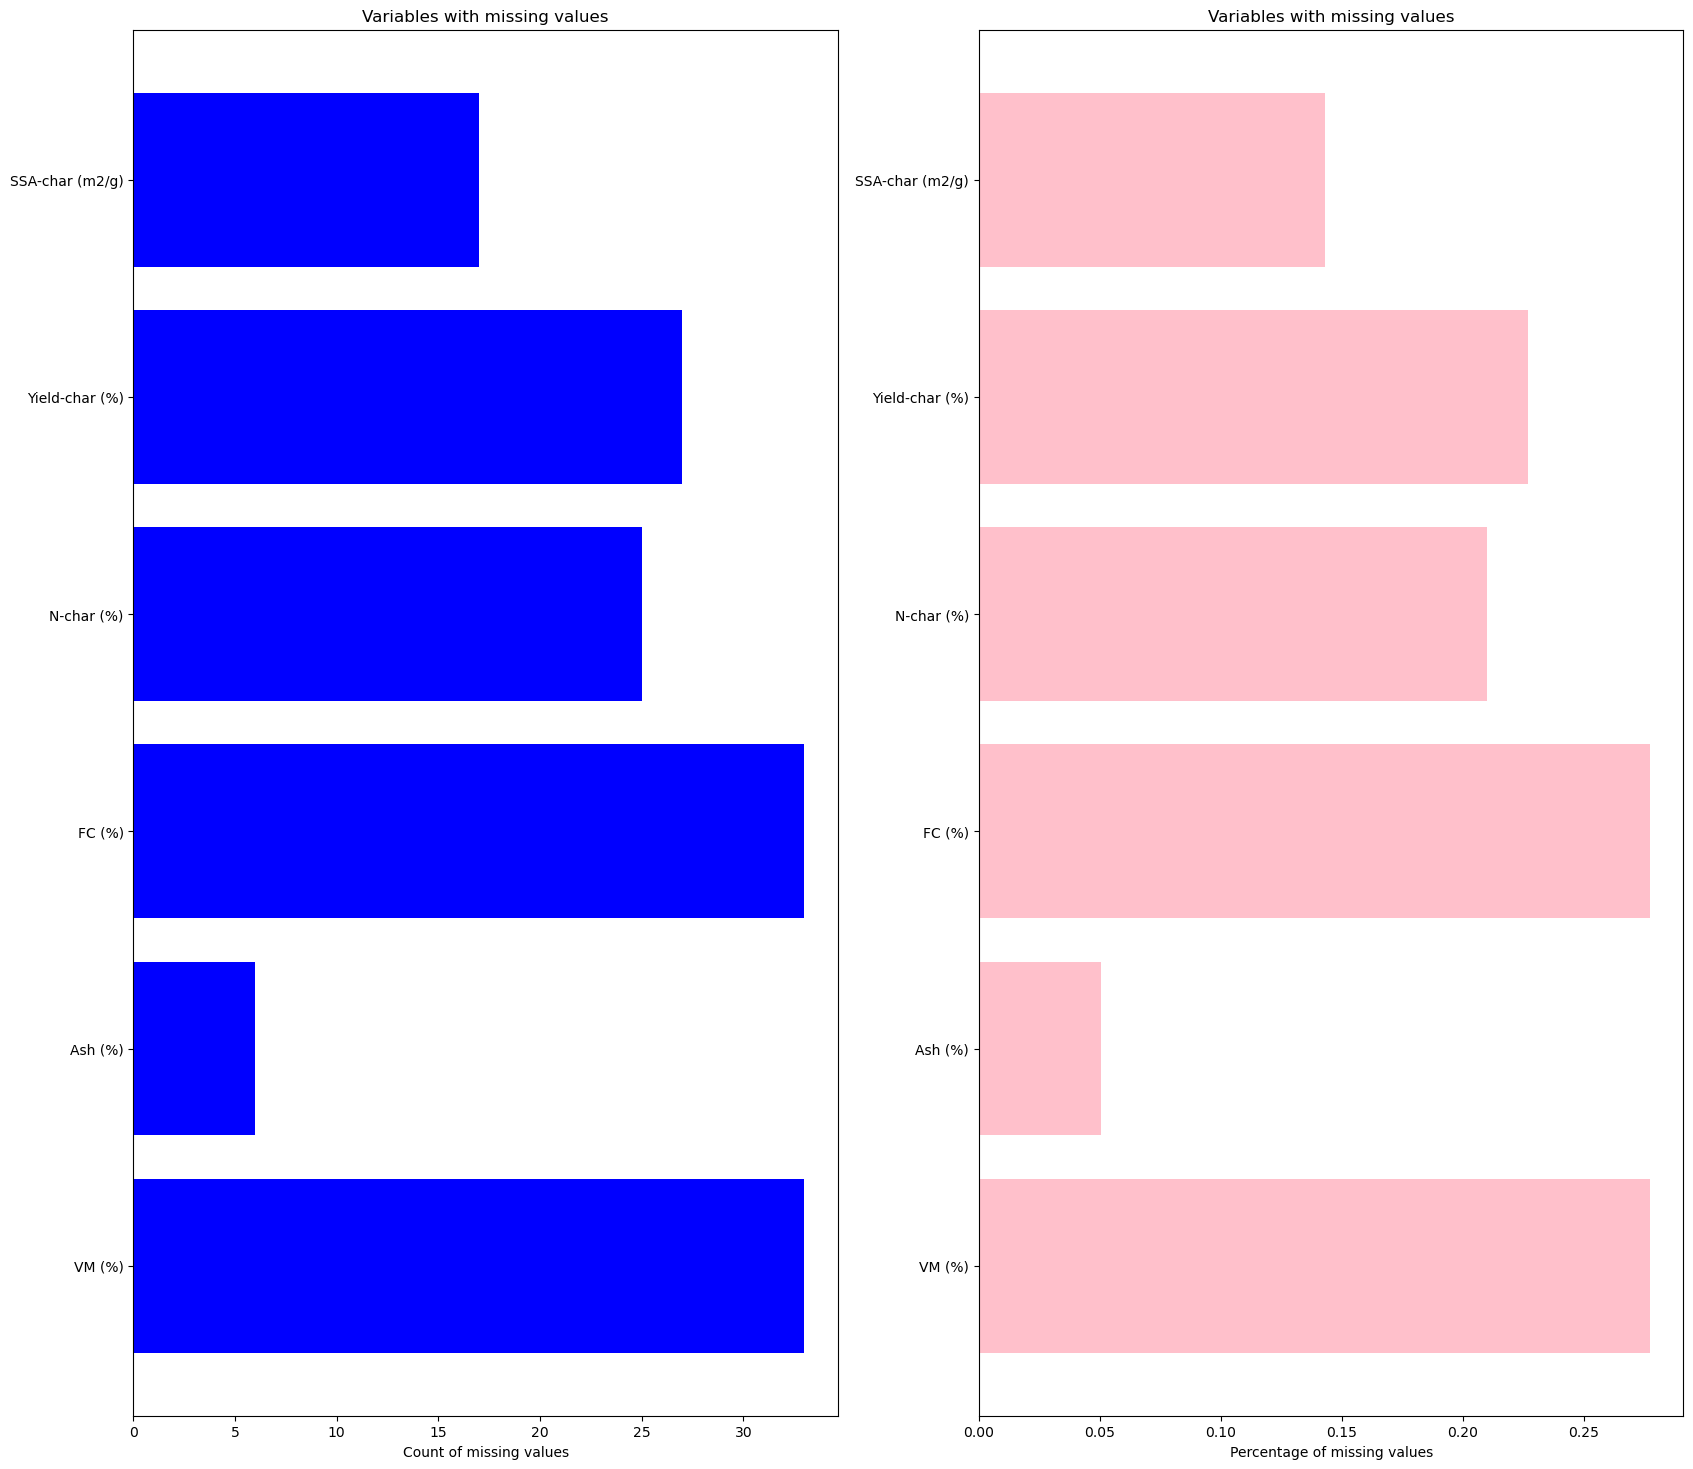

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0])
    
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");

rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

We can also visualize the missing values using charts

<Axes: >

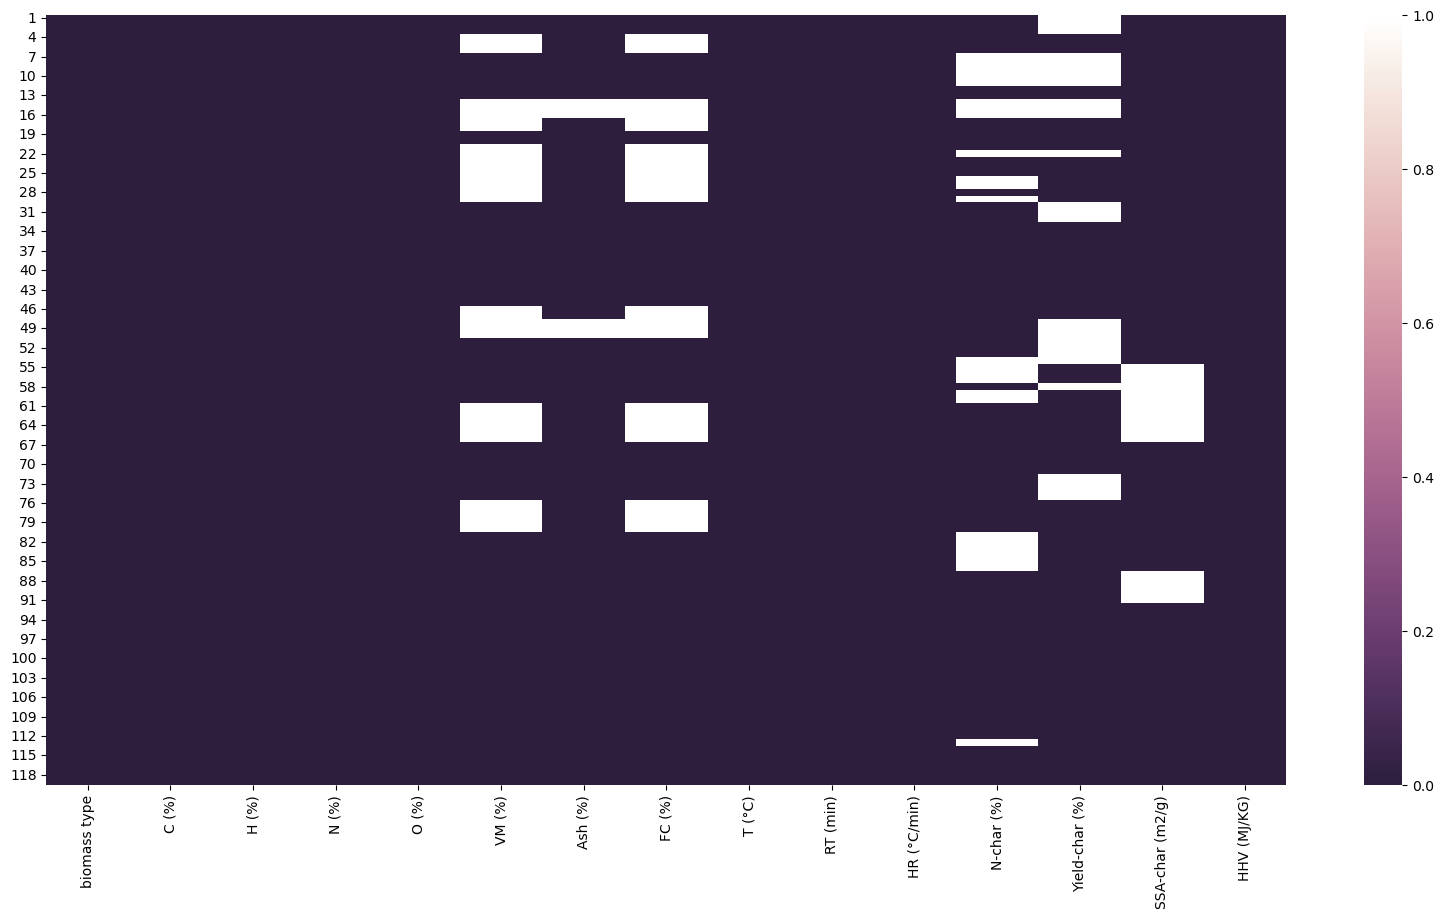

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

In [16]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)

Number of Numerical features:  14
Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)',
       'T (°C)', 'RT (min)', 'HR (°C/min)', 'N-char (%)', 'Yield-char (%)',
       'SSA-char (m2/g)', 'HHV (MJ/KG)'],
      dtype='object')


<Axes: >

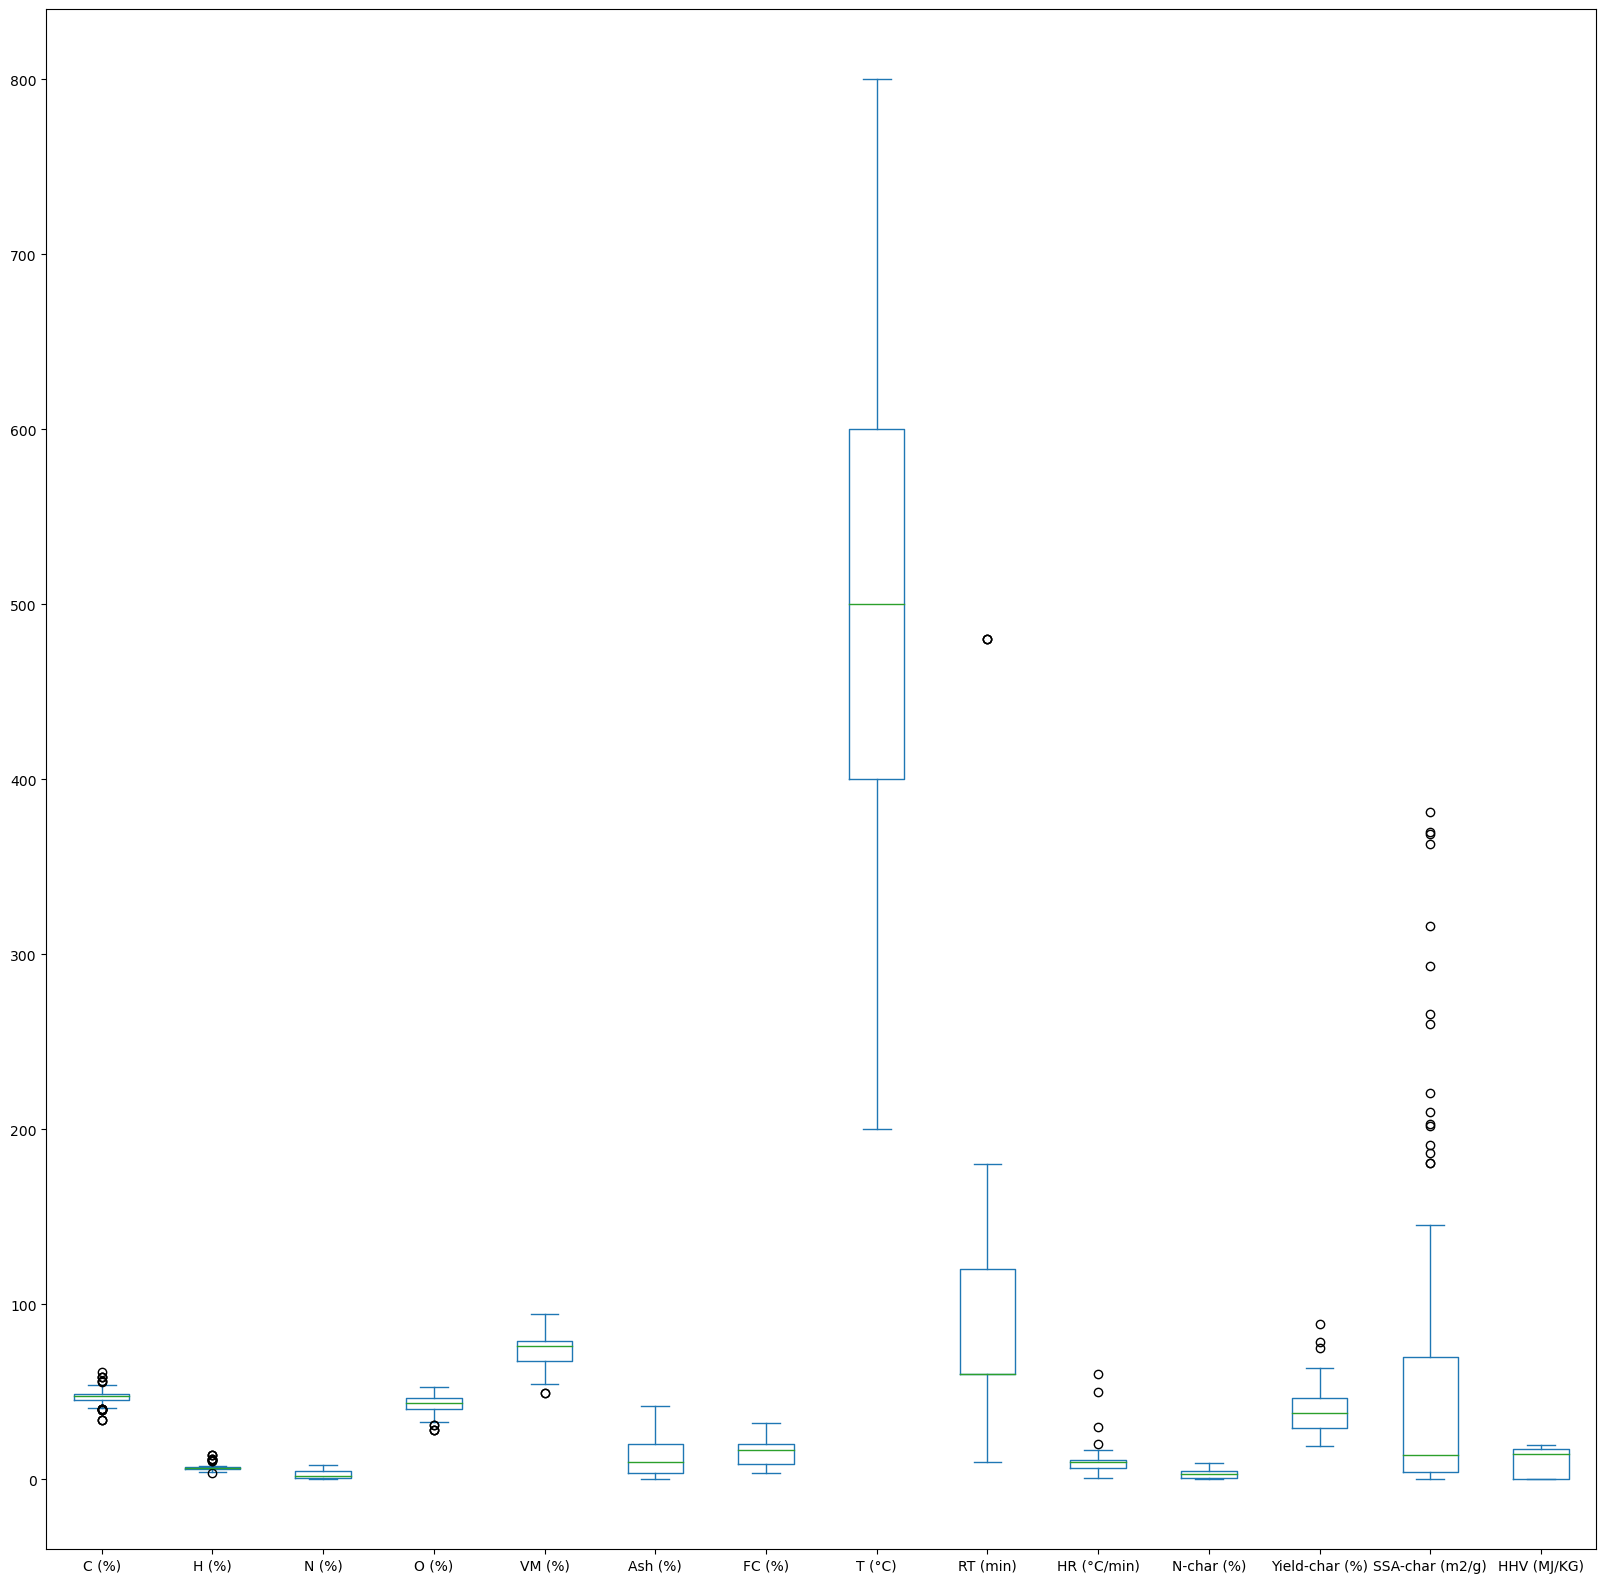

In [17]:
df.plot.box(figsize=(20,20))

##### From the above boxlot we can see that outliers are present in 'C (%)', 'H (%)', 'O (%)' and 'HR (°C/min)'

<Axes: ylabel='C (%)'>

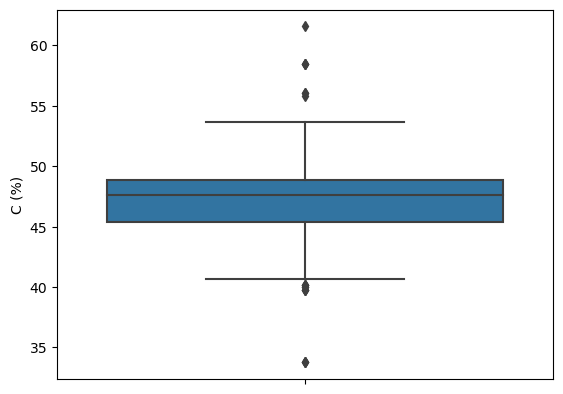

In [18]:
#df['C (%)'].plot.box()
sns.boxplot(y='C (%)', data=df)

<Axes: ylabel='H (%)'>

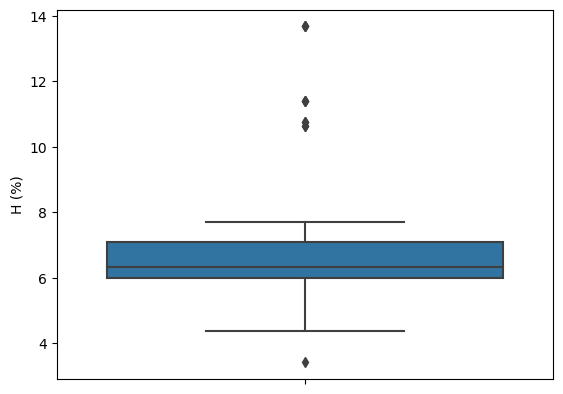

In [19]:
#df['C (%)'].plot.box()
sns.boxplot(y='H (%)', data=df)

<Axes: ylabel='O (%)'>

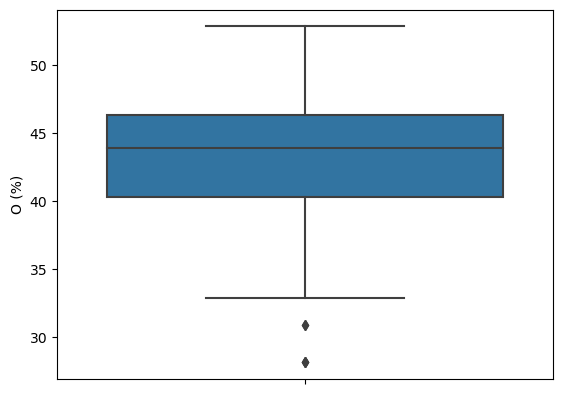

In [20]:
#df['C (%)'].plot.box()
sns.boxplot(y='O (%)', data=df)

<Axes: ylabel='HR (°C/min)'>

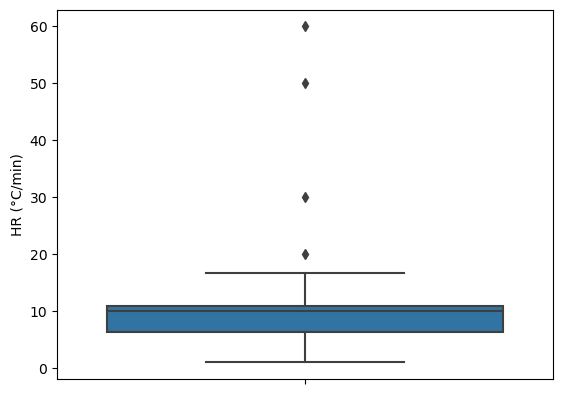

In [21]:
#df['C (%)'].plot.box()
sns.boxplot(y='HR (°C/min)', data=df)

In [22]:
import warnings
warnings.filterwarnings("ignore")

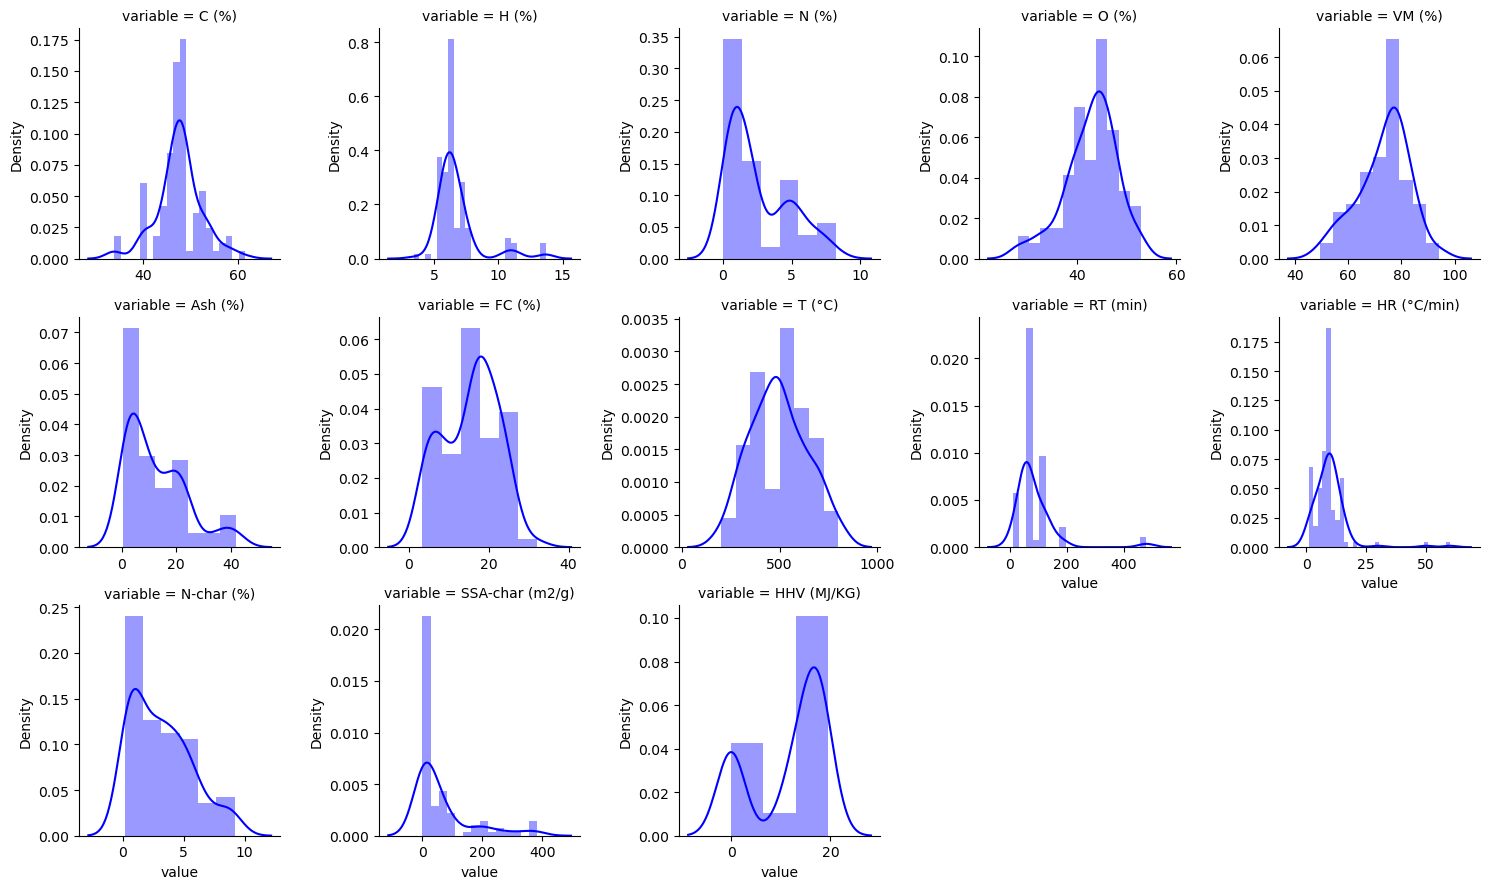

In [23]:
f = pd.melt(df, id_vars=['Yield-char (%)'],value_vars= numerical_features[numerical_features != 'Yield-char (%)'])
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="blue") 

array([[<Axes: title={'center': 'C (%)'}>,
        <Axes: title={'center': 'H (%)'}>,
        <Axes: title={'center': 'N (%)'}>,
        <Axes: title={'center': 'O (%)'}>],
       [<Axes: title={'center': 'VM (%)'}>,
        <Axes: title={'center': 'Ash (%)'}>,
        <Axes: title={'center': 'FC (%)'}>,
        <Axes: title={'center': 'T (°C)'}>],
       [<Axes: title={'center': 'RT (min)'}>,
        <Axes: title={'center': 'HR (°C/min)'}>,
        <Axes: title={'center': 'N-char (%)'}>,
        <Axes: title={'center': 'Yield-char (%)'}>],
       [<Axes: title={'center': 'SSA-char (m2/g)'}>,
        <Axes: title={'center': 'HHV (MJ/KG)'}>, <Axes: >, <Axes: >]],
      dtype=object)

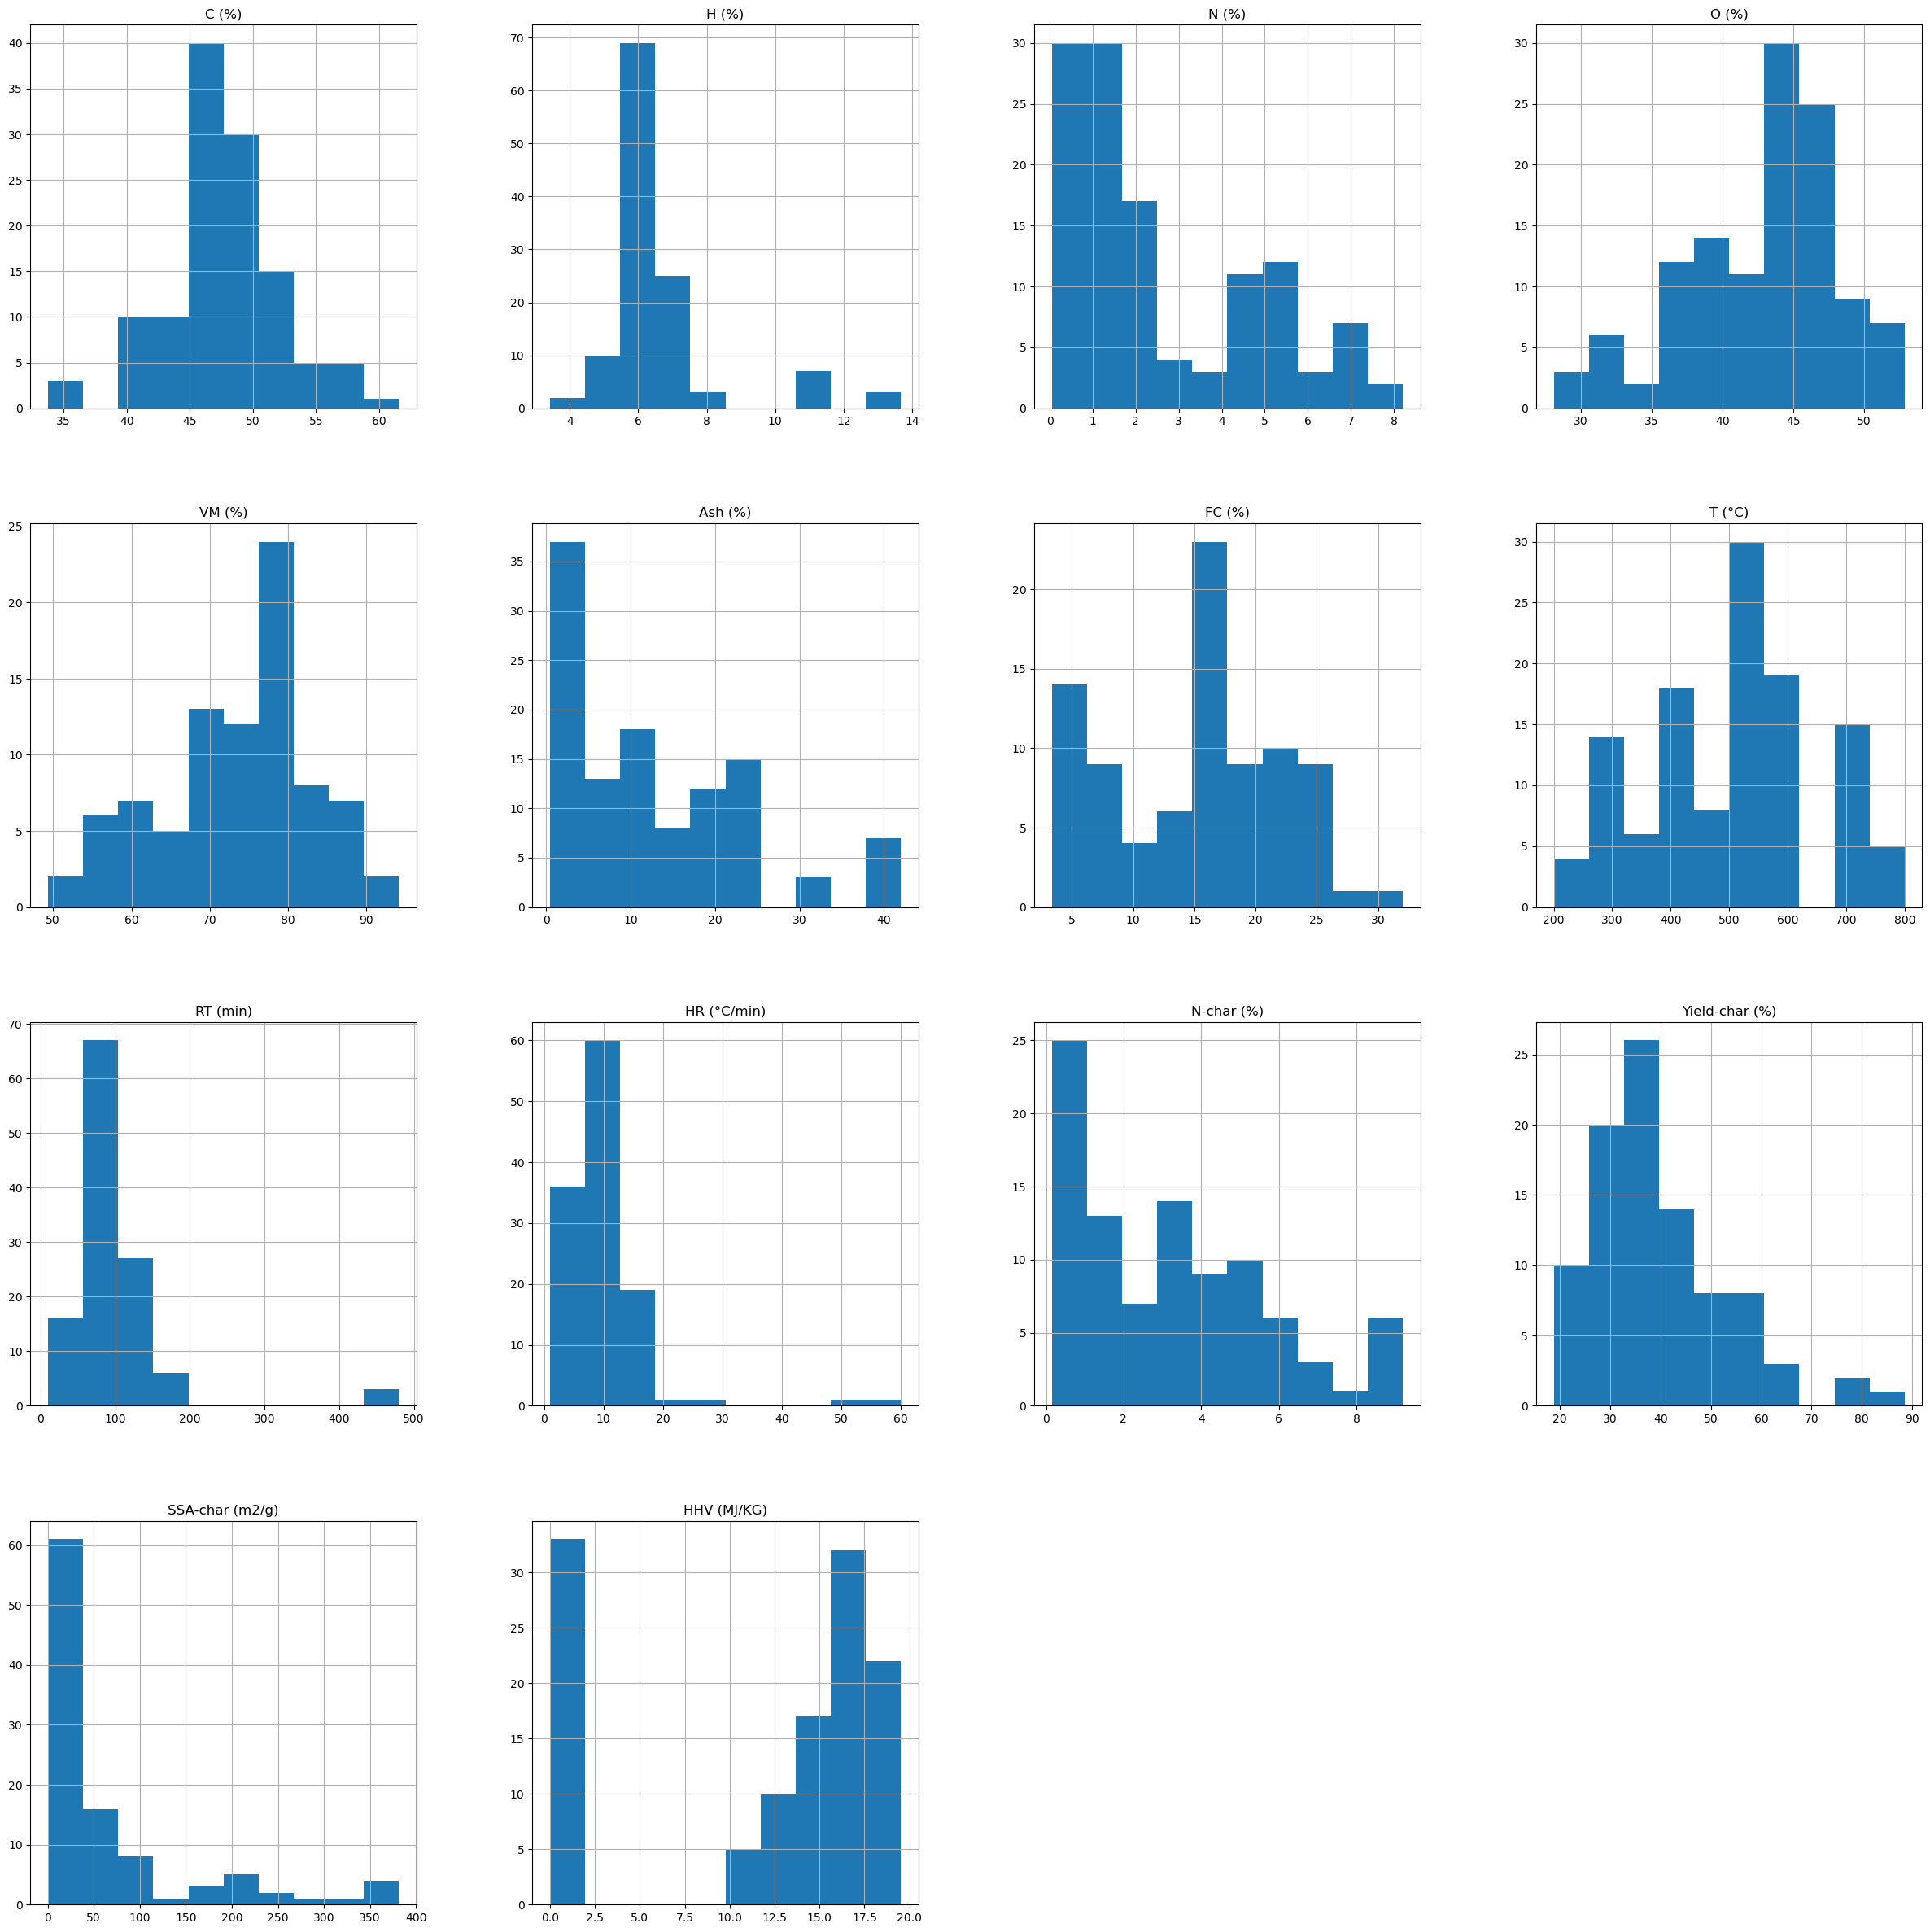

In [24]:
df.hist(figsize=(30,30))

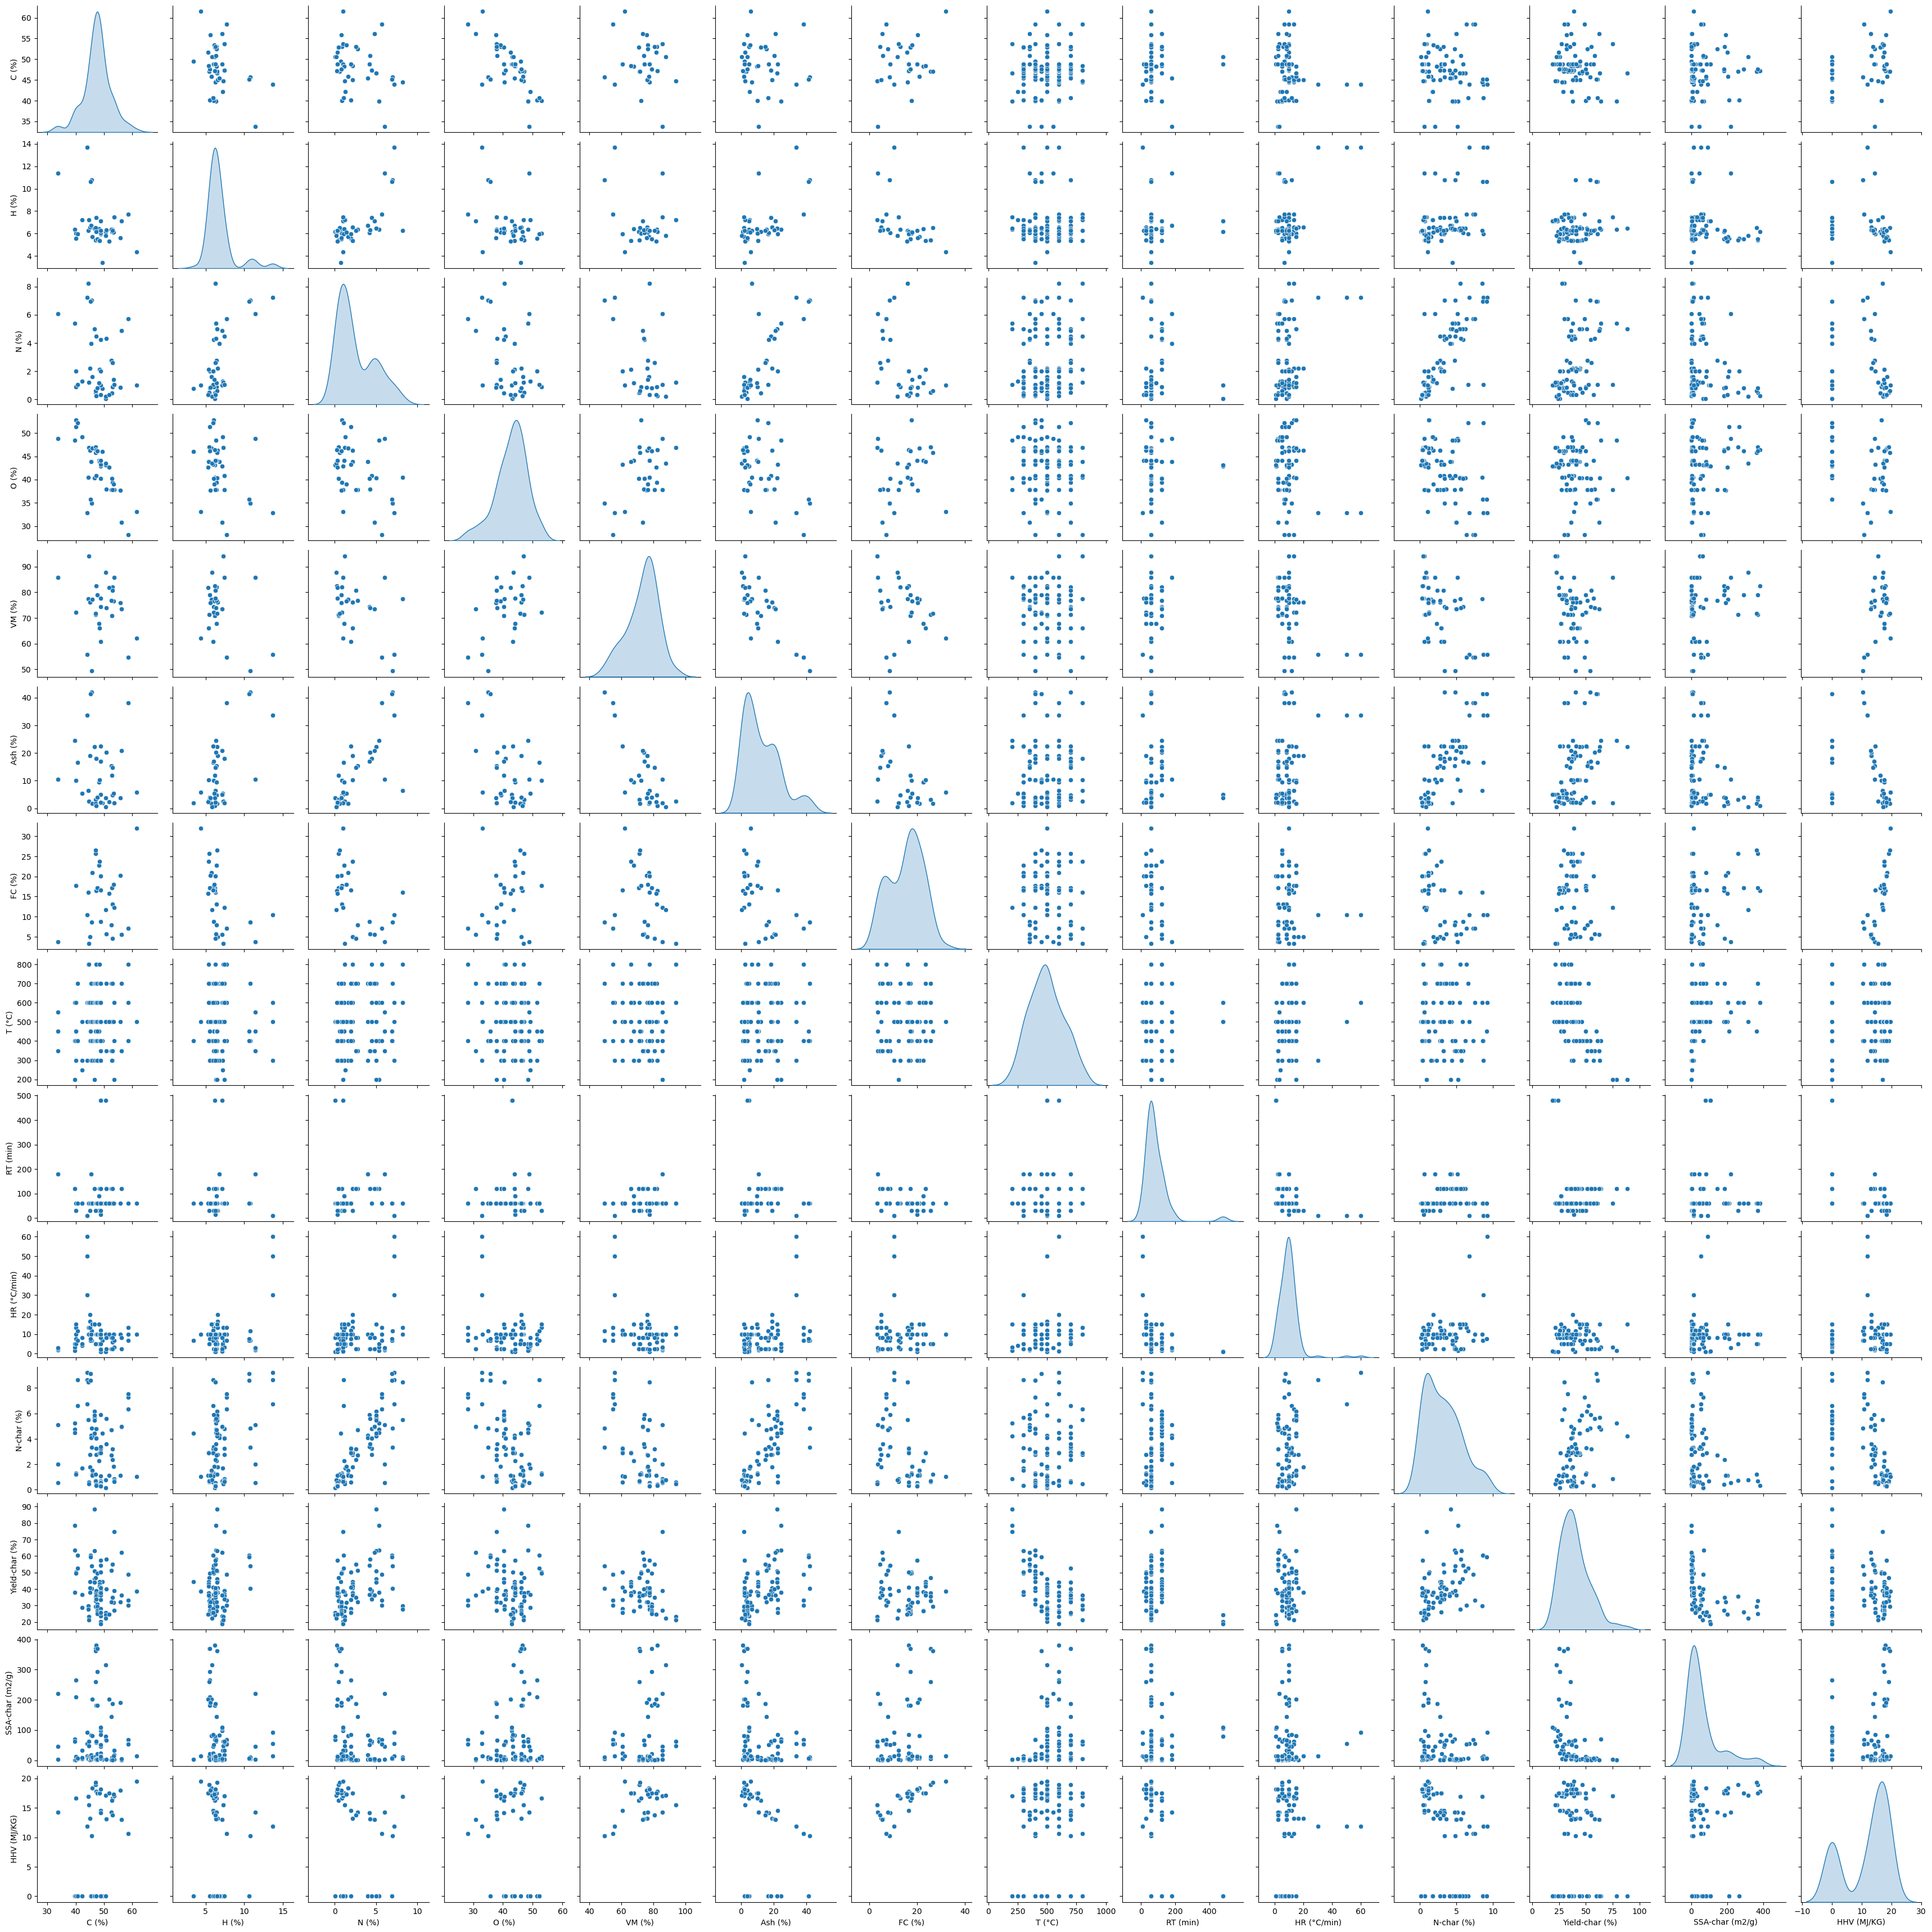

In [25]:
sns.pairplot(df,diag_kind='kde')

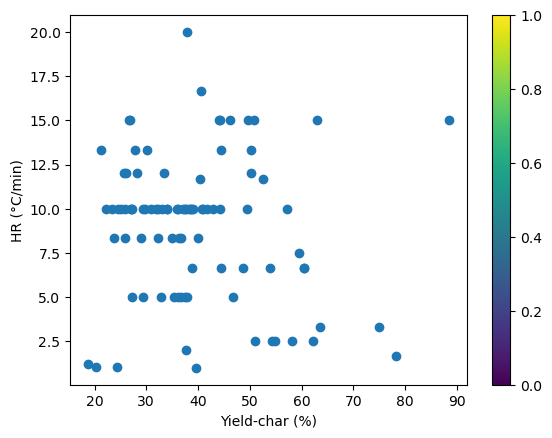

In [26]:
plt.scatter(df['Yield-char (%)'], df['HR (°C/min)'], cmap='viridis')
plt.xlabel('Yield-char (%)')
plt.ylabel('HR (°C/min)')
plt.colorbar()
plt.show()

In [8]:
#we will replace the null values by median values
features=['VM (%)','FC (%)','Ash (%)']
for feature in features:
 df[feature].fillna(df[feature].median(),inplace=True)


C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\2011118909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature].fillna(df[feature].median(),inplace=True)
C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\2011118909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature].fillna(df[feature].median(),inplace=True)
C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\2011118909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [9]:
df1=df[df['C (%)']>53.042]
df2=df[df['C (%)']<=53.042]
df1['C (%)']=53.042
df=pd.concat([df1,df2])
df1=df[df['C (%)']>=40.5]
df2=df[df['C (%)']<40.5]
df2['C (%)']=40.5
df=pd.concat([df1,df2])

C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\1325046273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['C (%)']=53.042
C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\1325046273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['C (%)']=40.5


In [10]:
df1=df[df['H (%)']>7.71]
df2=df[df['H (%)']<=7.71]
df1['H (%)']=7.71
df=pd.concat([df1,df2])
df1=df[df['H (%)']>=5.5]
df2=df[df['H (%)']<5.5]
df2['H (%)']=5.5
df=pd.concat([df1,df2])


C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\367442938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['H (%)']=7.71
C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\367442938.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['H (%)']=5.5


In [11]:
df1=df[df['O (%)']>48.8]
df2=df[df['O (%)']<=48.8]
df1['O (%)']=48.8
df=pd.concat([df1,df2])
df1=df[df['O (%)']>=35.7]
df2=df[df['O (%)']<35.7]
df2['O (%)']=35.7
df=pd.concat([df1,df2])

C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\432582149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['O (%)']=48.8
C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\432582149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['O (%)']=35.7


In [12]:
df1=df[df['HR (°C/min)']>15]
df2=df[df['HR (°C/min)']<=15]
df1['HR (°C/min)']=15
df=pd.concat([df1,df2])
df1=df[df['HR (°C/min)']>=2.5]
df2=df[df['HR (°C/min)']<2.5]
df2['HR (°C/min)']=2.5
df=pd.concat([df1,df2])


C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\678063774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HR (°C/min)']=15
C:\Users\rutvi\AppData\Local\Temp\ipykernel_2268\678063774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['HR (°C/min)']=2.5


In [140]:
df1=df.copy()
df1.dropna(subset=['Yield-char (%)'],inplace=True)
X = df1.drop(['biomass type','C (%)', 'H (%)', 'N (%)', 'O (%)',"Yield-char (%)",'N-char (%)','SSA-char (m2/g)', 'HHV (MJ/KG)'],axis=1)
y = df1["Yield-char (%)"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions_1 = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_1),3))
print('end')

SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions_2 = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_2))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_2),3))
print('end')

Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions_3 = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_3))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_3),3))
print('end')

Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions_4 = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_4))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_4))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_4),3))
print('end')

Model3 = DecisionTreeRegressor( max_depth=100,
max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.10,
random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions_5 = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_5))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_5))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_5)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_5),3))
print('end')

Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions_6 = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_6))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_6))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_6)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_6),3))
print('end')


Mean absolute error (MAE): 7.561887548111544
Mean square error (MSE): 88.57521078038236
Root mean square error (RMSE): 9.411440420062295
R-squared value of predictions: 0.638
end
Mean absolute error (MAE): 11.091538866740253
Mean square error (MSE): 313.4870750428296
Root mean square error (RMSE): 17.70556621638601
R-squared value of predictions: -0.28
end
Mean absolute error (MAE): 6.0135219082045435
Mean square error (MSE): 57.567531974212116
Root mean square error (RMSE): 7.587327063875137
R-squared value of predictions: 0.765
end
Mean absolute error (MAE): 6.31461370586876
Mean square error (MSE): 63.12651707416643
Root mean square error (RMSE): 7.945219762484007
R-squared value of predictions: 0.742
end
Mean absolute error (MAE): 7.64785013703868
Mean square error (MSE): 105.80297846629003
Root mean square error (RMSE): 10.28605747924296
R-squared value of predictions: 0.568
end
Mean absolute error (MAE): 7.41945467731163
Mean square error (MSE): 70.05826862028836
Root mean square

In [129]:
df5=[predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6]

for i in df5:
    print(round(metrics.mean_absolute_error(y_test,i),2))
    print(round(metrics.mean_squared_error(y_test,i),2))
    print(round(np.sqrt(metrics.mean_squared_error(y_test,i)),2))
    print(round(metrics.r2_score(y_test,i),2))
    print('end')

7.56
88.58
9.41
0.64
end
11.09
313.49
17.71
-0.28
end
6.01
57.57
7.59
0.76
end
6.33
63.73
7.98
0.74
end
7.65
105.8
10.29
0.57
end
7.5
78.69
8.87
0.68
end


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

In [47]:
# create ANN model
model = Sequential()
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='ELU'))
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
#model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
# Fitting the ANN to the Training set
model.fit(x_train, y_train ,batch_size = 5, epochs = 1000, verbose=1)

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 1624.5665
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 1506.1411
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 1362.4895
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 1182.7339
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 977.2206
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 762.9012
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 572.7857
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 429.8853
Epoch 9/1000
13/13 [==============================] - 0s 4ms/step - loss: 348.9223
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 305.7257
Epoch 11/1000
13/13 [==============================] - 0s 4ms/step - loss: 301.1573
Epoch 12/1000
13/13 [==============================] - 0s 4ms/step - loss: 295.98

13/13 [==============================] - 0s 3ms/step - loss: 37.1677
Epoch 196/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.7860
Epoch 197/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.8735
Epoch 198/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.5781
Epoch 199/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.5597
Epoch 200/1000
13/13 [==============================] - 0s 3ms/step - loss: 38.4023
Epoch 201/1000
13/13 [==============================] - 0s 3ms/step - loss: 37.4528
Epoch 202/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.8666
Epoch 203/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.8988
Epoch 204/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.3022
Epoch 205/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.6489
Epoch 206/1000
13/13 [==============================] - 0s 3ms/step - loss: 36.2753
Epoch 2

13/13 [==============================] - 0s 3ms/step - loss: 34.4383
Epoch 390/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.6867
Epoch 391/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.4699
Epoch 392/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.8534
Epoch 393/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.1728
Epoch 394/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.4084
Epoch 395/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.4100
Epoch 396/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.9451
Epoch 397/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.3520
Epoch 398/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.2892
Epoch 399/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.5894
Epoch 400/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.7743
Epoch 4

13/13 [==============================] - 0s 3ms/step - loss: 33.8877
Epoch 584/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.8978
Epoch 585/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.0924
Epoch 586/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.2155
Epoch 587/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.9869
Epoch 588/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.4429
Epoch 589/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.4062
Epoch 590/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.6167
Epoch 591/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.2326
Epoch 592/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.8645
Epoch 593/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.7837
Epoch 594/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.2203
Epoch 5

13/13 [==============================] - 0s 4ms/step - loss: 32.7341
Epoch 778/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.6606
Epoch 779/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.9102
Epoch 780/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.9900
Epoch 781/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.4725
Epoch 782/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.0522
Epoch 783/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.6754
Epoch 784/1000
13/13 [==============================] - 0s 3ms/step - loss: 34.1212
Epoch 785/1000
13/13 [==============================] - 0s 4ms/step - loss: 32.4554
Epoch 786/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.8222
Epoch 787/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.4276
Epoch 788/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.7983
Epoch 7

13/13 [==============================] - 0s 3ms/step - loss: 32.3140
Epoch 972/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.3602
Epoch 973/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.4819
Epoch 974/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.3344
Epoch 975/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.8153
Epoch 976/1000
13/13 [==============================] - 0s 3ms/step - loss: 33.4648
Epoch 977/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.9301
Epoch 978/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.6581
Epoch 979/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.2353
Epoch 980/1000
13/13 [==============================] - 0s 3ms/step - loss: 32.8127
Epoch 981/1000
13/13 [==============================] - 0s 4ms/step - loss: 32.4481
Epoch 982/1000
13/13 [==============================] - 0s 4ms/step - loss: 32.4673
Epoch 9

In [48]:
predictions_7 = model.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_7))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_7))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_7)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_7),3))
ans=[]
for i  in predictions_7:
    ans.append(i[0])
print(ans)

1/1 [==============================] - 0s 87ms/step
Mean absolute error (MAE): 7.696762405483739
Mean square error (MSE): 72.87349238911823
Root mean square error (RMSE): 8.536597237138357
R-squared value of predictions: 0.702


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Adaptive Boosting')]

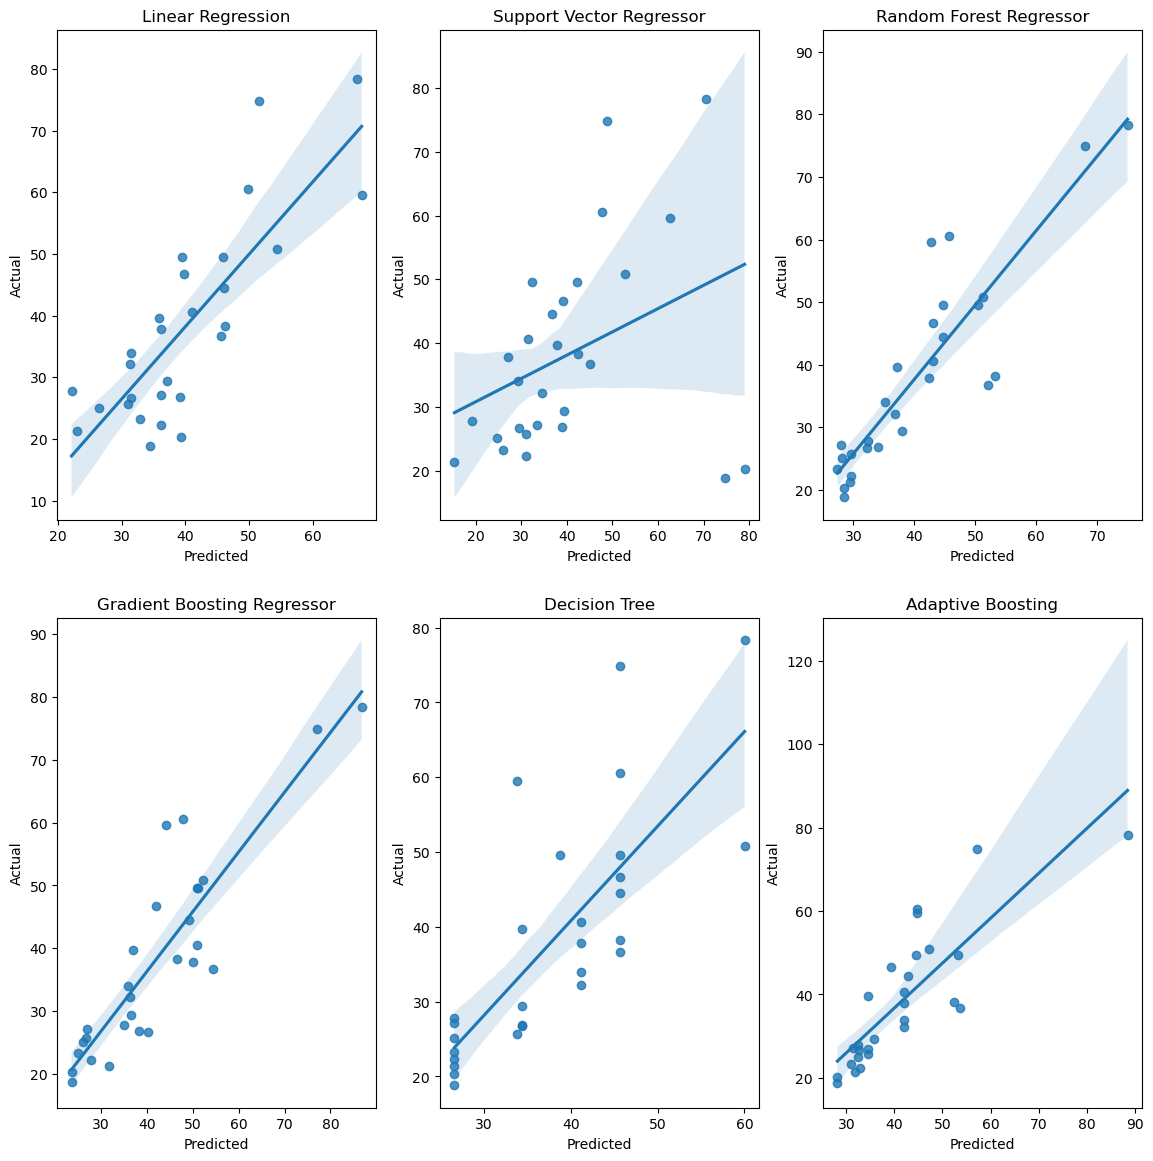

In [94]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(14,14))
ax = sns.regplot(x=predictions_1, y=y_test, scatter= True, fit_reg= True,ax=ax1)
ax.set(xlabel='Predicted',ylabel='Actual',title='Linear Regression')

ax = sns.regplot(x=predictions_2, y=y_test, scatter= True, fit_reg= True,ax=ax2)
ax.set(xlabel='Predicted',ylabel='Actual',title='Support Vector Regressor')

ax = sns.regplot(x=predictions_3, y=y_test, scatter= True, fit_reg= True, ax=ax3)
ax.set(xlabel='Predicted',ylabel='Actual',title='Random Forest Regressor')

ax = sns.regplot(x=predictions_4, y=y_test, scatter= True, fit_reg= True, ax=ax4)
ax.set(xlabel='Predicted',ylabel='Actual',title='Gradient Boosting Regressor')

ax = sns.regplot(x=predictions_5, y=y_test, scatter= True, fit_reg= True, ax=ax5)
ax.set(xlabel='Predicted',ylabel='Actual',title='Decision Tree')

ax = sns.regplot(x=predictions_6, y=y_test, scatter= True, fit_reg= True, ax=ax6)
ax.set(xlabel='Predicted',ylabel='Actual',title='Adaptive Boosting')


In [130]:
df1=df.copy()
df1.dropna(subset=['Yield-char (%)'],inplace=True)
X = df1.drop(['biomass type','VM (%)', 'Ash (%)','FC (%)',"Yield-char (%)",'N-char (%)','SSA-char (m2/g)', 'HHV (MJ/KG)'],axis=1)
y = df1["Yield-char (%)"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions_1 = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_1),3))


SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions_2 = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_2))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_2),3))

Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions_3 = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_3))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_3),3))

Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions_4 = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_4))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_4))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_4),3))

Model3 = DecisionTreeRegressor( max_depth=100,
max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.10,
random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions_5 = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_5))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_5))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_5)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_5),3))

Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions_6 = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_6))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_6))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_6)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_6),3))

Mean absolute error (MAE): 7.313749379818369
Mean square error (MSE): 85.83010477308314
Root mean square error (RMSE): 9.264453830263452
R-squared value of predictions: 0.65
Mean absolute error (MAE): 8.8902037030983
Mean square error (MSE): 139.01850314626475
Root mean square error (RMSE): 11.7906108046303
R-squared value of predictions: 0.432
Mean absolute error (MAE): 6.678195404982357
Mean square error (MSE): 68.50402889806244
Root mean square error (RMSE): 8.276716069677782
R-squared value of predictions: 0.72
Mean absolute error (MAE): 4.815109029989232
Mean square error (MSE): 41.36374001874396
Root mean square error (RMSE): 6.431464842377975
R-squared value of predictions: 0.831
Mean absolute error (MAE): 8.797419194969878
Mean square error (MSE): 117.53626101991131
Root mean square error (RMSE): 10.841414161441824
R-squared value of predictions: 0.52
Mean absolute error (MAE): 8.316252129737311
Mean square error (MSE): 96.2429205897876
Root mean square error (RMSE): 9.81034762

In [131]:
df5=[predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6]

for i in df5:
    print(round(metrics.mean_absolute_error(y_test,i),2))
    print(round(metrics.mean_squared_error(y_test,i),2))
    print(round(np.sqrt(metrics.mean_squared_error(y_test,i)),2))
    print(round(metrics.r2_score(y_test,i),2))
    print('end')

7.31
85.83
9.26
0.65
end
8.89
139.02
11.79
0.43
end
6.68
68.5
8.28
0.72
end
4.82
41.36
6.43
0.83
end
8.8
117.54
10.84
0.52
end
8.32
96.24
9.81
0.61
end


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Adaptive Boosting')]

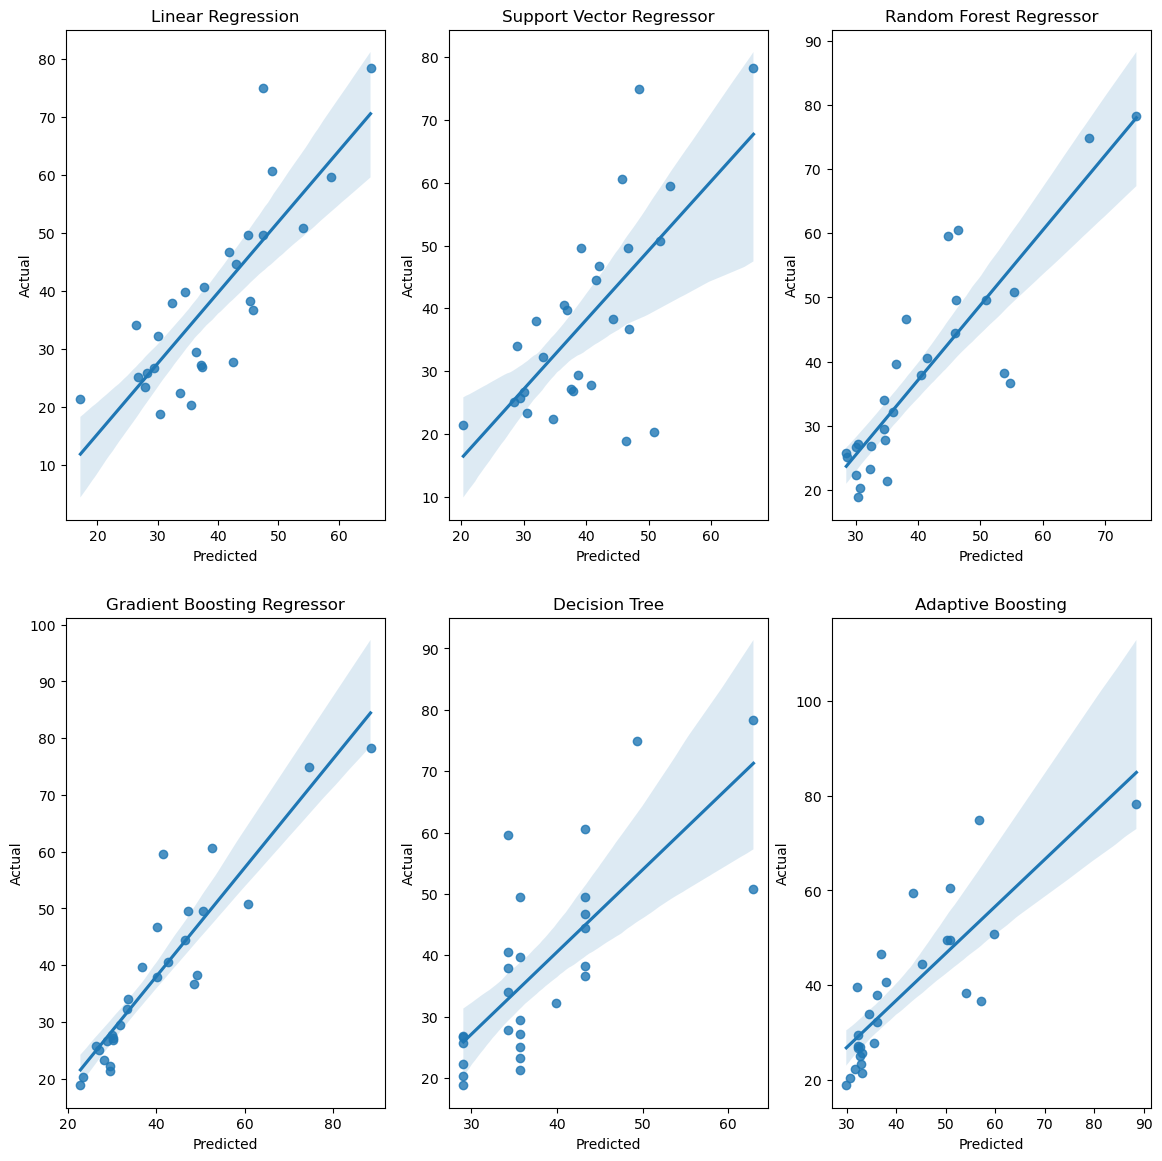

In [99]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(14,14))
ax = sns.regplot(x=predictions_1, y=y_test, scatter= True, fit_reg= True,ax=ax1)
ax.set(xlabel='Predicted',ylabel='Actual',title='Linear Regression')

ax = sns.regplot(x=predictions_2, y=y_test, scatter= True, fit_reg= True,ax=ax2)
ax.set(xlabel='Predicted',ylabel='Actual',title='Support Vector Regressor')

ax = sns.regplot(x=predictions_3, y=y_test, scatter= True, fit_reg= True, ax=ax3)
ax.set(xlabel='Predicted',ylabel='Actual',title='Random Forest Regressor')

ax = sns.regplot(x=predictions_4, y=y_test, scatter= True, fit_reg= True, ax=ax4)
ax.set(xlabel='Predicted',ylabel='Actual',title='Gradient Boosting Regressor')

ax = sns.regplot(x=predictions_5, y=y_test, scatter= True, fit_reg= True, ax=ax5)
ax.set(xlabel='Predicted',ylabel='Actual',title='Decision Tree')

ax = sns.regplot(x=predictions_6, y=y_test, scatter= True, fit_reg= True, ax=ax6)
ax.set(xlabel='Predicted',ylabel='Actual',title='Adaptive Boosting')


In [145]:
Model2 = GradientBoostingRegressor(n_estimators= 1100, max_depth= 3, learning_rate= 0.2)
Model2.fit(x_train,y_train)
predictions = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))


Mean absolute error (MAE): 6.959629491319638
Mean square error (MSE): 80.70969072083024
Root mean square error (RMSE): 8.983857229544013
R-squared value of predictions: 0.67


VM (%) -> 0.04943876635405125
Ash (%) -> 0.16520317571567295
FC (%) -> 0.042335498139898245
T (°C) -> 0.6201443650686785
RT (min) -> 0.025432634279113967
HR (°C/min) -> 0.0974455604425849


NameError: name 'addlabels' is not defined

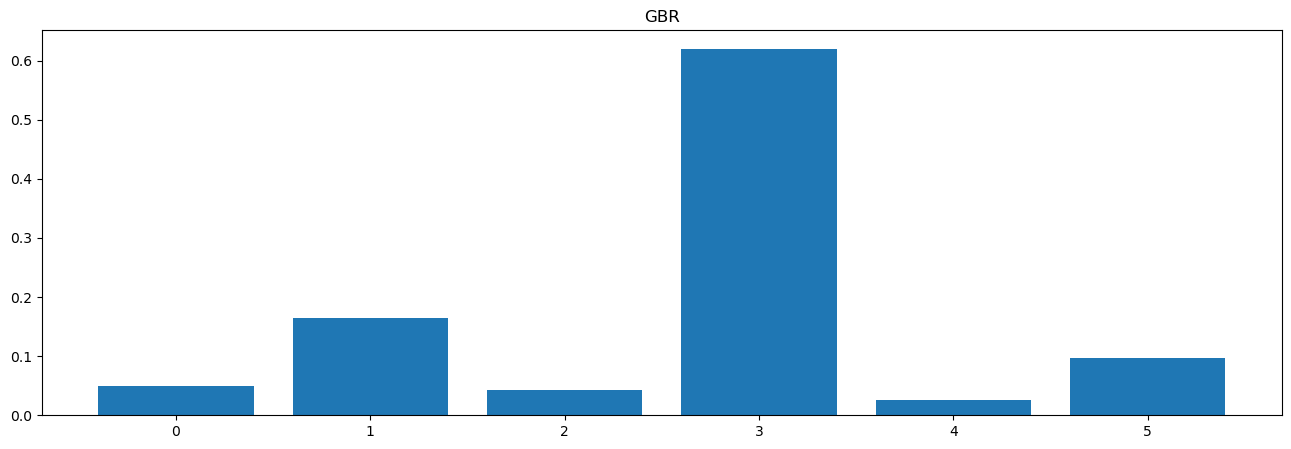

In [151]:
features =Model2.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="GBR")
#plt.xlabel('C (%)','H (%)','N (%)','O (%)','T (°C)','RT (min)','HR (°C/min)')
plt.bar([x for x in range(len(features))],features)
plt.show()


[Text(0, 0, 'VM (%)'),
 Text(1, 0, 'Ash (%)'),
 Text(2, 0, 'FC (%)'),
 Text(3, 0, 'T (°C)'),
 Text(4, 0, 'RT (min)'),
 Text(5, 0, 'HR (°C/min)')]

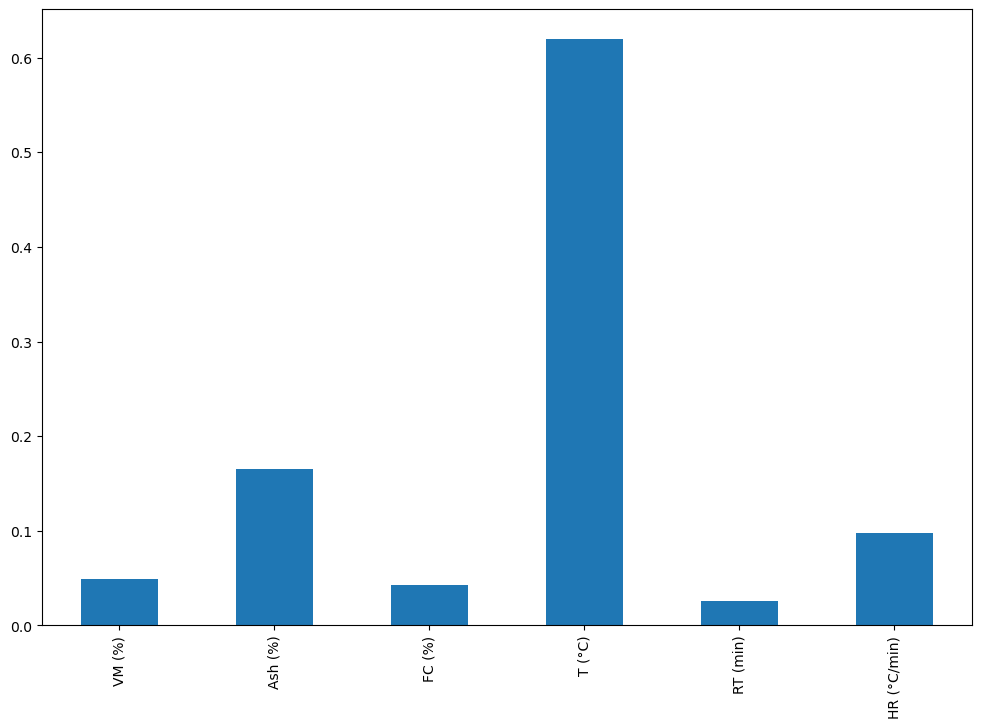

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

frequencies = []
x_labels = []
Columns = list(X.columns)
for i,j in enumerate(features):
    frequencies.append(j)
    x_labels.append(Columns[i])

freq_series = pd.Series(frequencies)


# Plot the figure.
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_xticklabels(x_labels)

In [132]:
df1=df.copy()
df1.dropna(subset=['SSA-char (m2/g)'],inplace=True)
X = df1.drop(['biomass type','C (%)', 'H (%)', 'N (%)', 'O (%)',"Yield-char (%)",'N-char (%)','SSA-char (m2/g)', 'HHV (MJ/KG)'],axis=1)
y = df1['SSA-char (m2/g)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions_1 = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_1),3))
print('end')

SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions_2 = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_2))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_2),3))
print('end')

Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions_3 = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_3))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_3),3))
print('end')

Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions_4 = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_4))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_4))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_4),3))
print('end')

Model3 = DecisionTreeRegressor( max_depth=100,
max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.10,
random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions_5 = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_5))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_5))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_5)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_5),3))
print('end')

Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions_6 = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_6))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_6))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_6)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_6),3))
print('end')

Mean absolute error (MAE): 55.337516690018205
Mean square error (MSE): 4710.733323773289
Root mean square error (RMSE): 68.63478217182079
R-squared value of predictions: -0.767
end
Mean absolute error (MAE): 28.299080266834792
Mean square error (MSE): 2378.899686219604
Root mean square error (RMSE): 48.77396525011683
R-squared value of predictions: 0.108
end
Mean absolute error (MAE): 61.19530321935484
Mean square error (MSE): 7288.195184665334
Root mean square error (RMSE): 85.3709270458353
R-squared value of predictions: -1.734
end
Mean absolute error (MAE): 56.43859312518523
Mean square error (MSE): 6241.7130671420055
Root mean square error (RMSE): 79.00451295427374
R-squared value of predictions: -1.341
end
Mean absolute error (MAE): 41.27115975501201
Mean square error (MSE): 4253.309553921751
Root mean square error (RMSE): 65.21740223223975
R-squared value of predictions: -0.595
end
Mean absolute error (MAE): 70.0387666036781
Mean square error (MSE): 7748.196009042735
Root mean sq

In [133]:
df5=[predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6]

for i in df5:
    print(round(metrics.mean_absolute_error(y_test,i),2))
    print(round(metrics.mean_squared_error(y_test,i),2))
    print(round(np.sqrt(metrics.mean_squared_error(y_test,i)),2))
    print(round(metrics.r2_score(y_test,i),2))
    print('end')

55.34
4710.73
68.63
-0.77
end
28.3
2378.9
48.77
0.11
end
61.2
7288.2
85.37
-1.73
end
56.44
6241.71
79.0
-1.34
end
41.27
4253.31
65.22
-0.6
end
70.04
7748.2
88.02
-1.91
end


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Adaptive Boosting')]

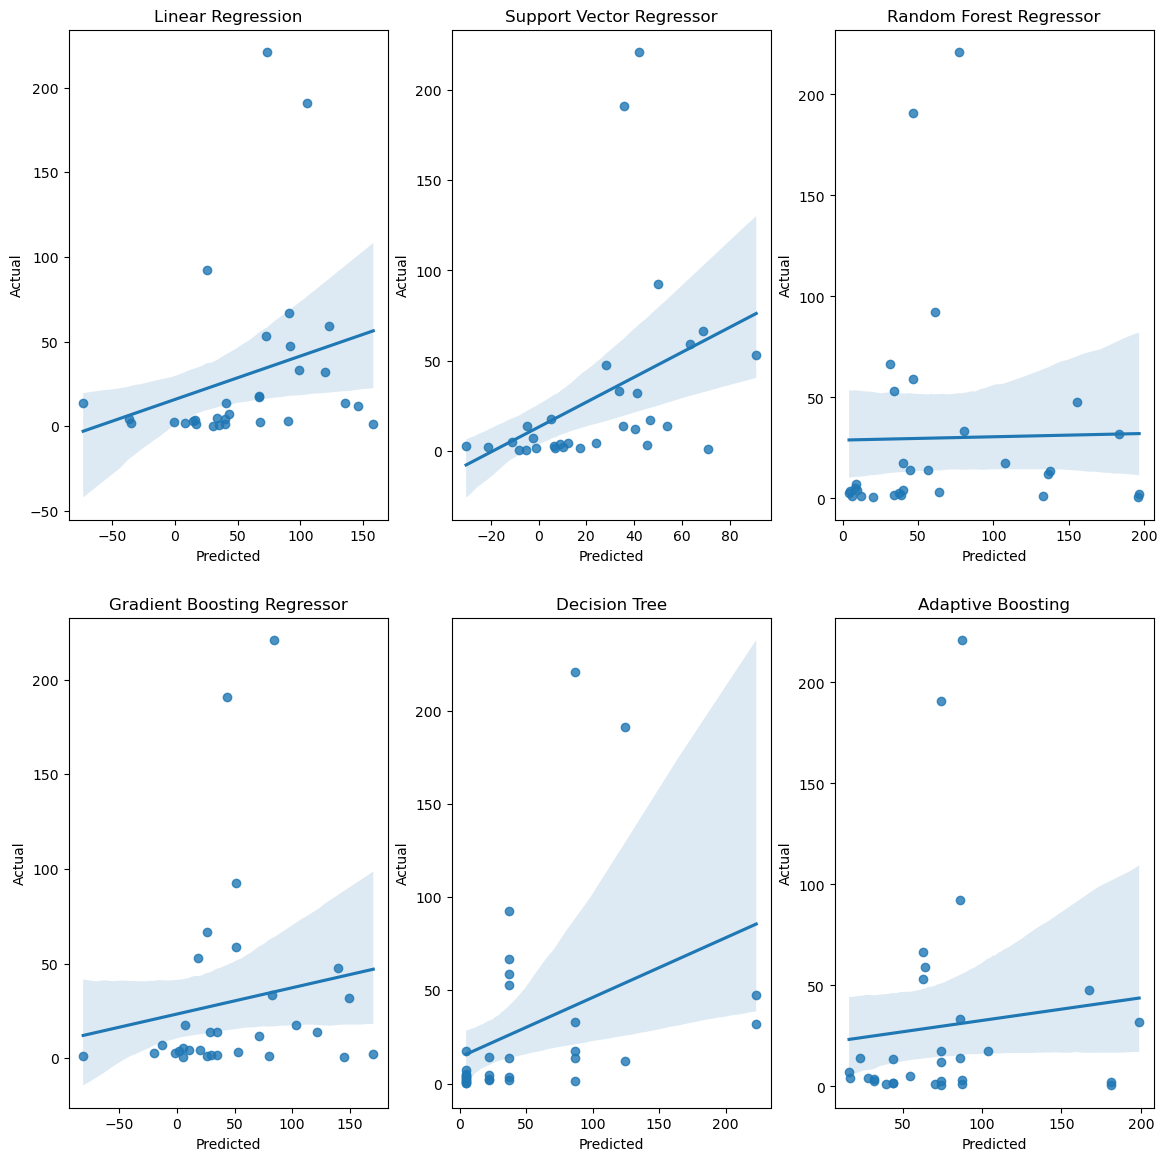

In [101]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(14,14))
ax = sns.regplot(x=predictions_1, y=y_test, scatter= True, fit_reg= True,ax=ax1)
ax.set(xlabel='Predicted',ylabel='Actual',title='Linear Regression')

ax = sns.regplot(x=predictions_2, y=y_test, scatter= True, fit_reg= True,ax=ax2)
ax.set(xlabel='Predicted',ylabel='Actual',title='Support Vector Regressor')

ax = sns.regplot(x=predictions_3, y=y_test, scatter= True, fit_reg= True, ax=ax3)
ax.set(xlabel='Predicted',ylabel='Actual',title='Random Forest Regressor')

ax = sns.regplot(x=predictions_4, y=y_test, scatter= True, fit_reg= True, ax=ax4)
ax.set(xlabel='Predicted',ylabel='Actual',title='Gradient Boosting Regressor')

ax = sns.regplot(x=predictions_5, y=y_test, scatter= True, fit_reg= True, ax=ax5)
ax.set(xlabel='Predicted',ylabel='Actual',title='Decision Tree')

ax = sns.regplot(x=predictions_6, y=y_test, scatter= True, fit_reg= True, ax=ax6)
ax.set(xlabel='Predicted',ylabel='Actual',title='Adaptive Boosting')

In [155]:
df1=df.copy()
df1.dropna(subset=['SSA-char (m2/g)'],inplace=True)
X = df1.drop(['biomass type','VM (%)', 'Ash (%)','FC (%)',"Yield-char (%)",'N-char (%)','SSA-char (m2/g)', 'HHV (MJ/KG)'],axis=1)
y = df1['SSA-char (m2/g)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions_1 = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_1),3))


SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions_2 = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_2))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_2),3))

Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions_3 = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_3))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_3),3))

Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions_4 = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_4))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_4))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_4),3))

Model3 = DecisionTreeRegressor( max_depth=100,
max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.10,
random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions_5 = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_5))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_5))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_5)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_5),3))

Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions_6 = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_6))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_6))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_6)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_6),3))

Mean absolute error (MAE): 56.363514687886706
Mean square error (MSE): 5020.859832810578
Root mean square error (RMSE): 70.85802588846643
R-squared value of predictions: -0.883
Mean absolute error (MAE): 26.66574373245481
Mean square error (MSE): 2321.4943853734726
Root mean square error (RMSE): 48.18188856171448
R-squared value of predictions: 0.129
Mean absolute error (MAE): 47.95878436344085
Mean square error (MSE): 5105.3463639278025
Root mean square error (RMSE): 71.45170651515471
R-squared value of predictions: -0.915
Mean absolute error (MAE): 49.40301022288942
Mean square error (MSE): 4894.351537031302
Root mean square error (RMSE): 69.95964220199602
R-squared value of predictions: -0.836
Mean absolute error (MAE): 52.74305568100358
Mean square error (MSE): 6720.693026769714
Root mean square error (RMSE): 81.97983304916957
R-squared value of predictions: -1.521
Mean absolute error (MAE): 52.10933278309964
Mean square error (MSE): 5178.632651754272
Root mean square error (RMSE):

In [135]:
df5=[predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6]

for i in df5:
    print(round(metrics.mean_absolute_error(y_test,i),2))
    print(round(metrics.mean_squared_error(y_test,i),2))
    print(round(np.sqrt(metrics.mean_squared_error(y_test,i)),2))
    print(round(metrics.r2_score(y_test,i),2))
    print('end')

56.36
5020.86
70.86
-0.88
end
26.67
2321.49
48.18
0.13
end
47.96
5105.35
71.45
-0.91
end
49.19
4851.4
69.65
-0.82
end
52.74
6720.69
81.98
-1.52
end
50.88
5339.79
73.07
-1.0
end


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Adaptive Boosting')]

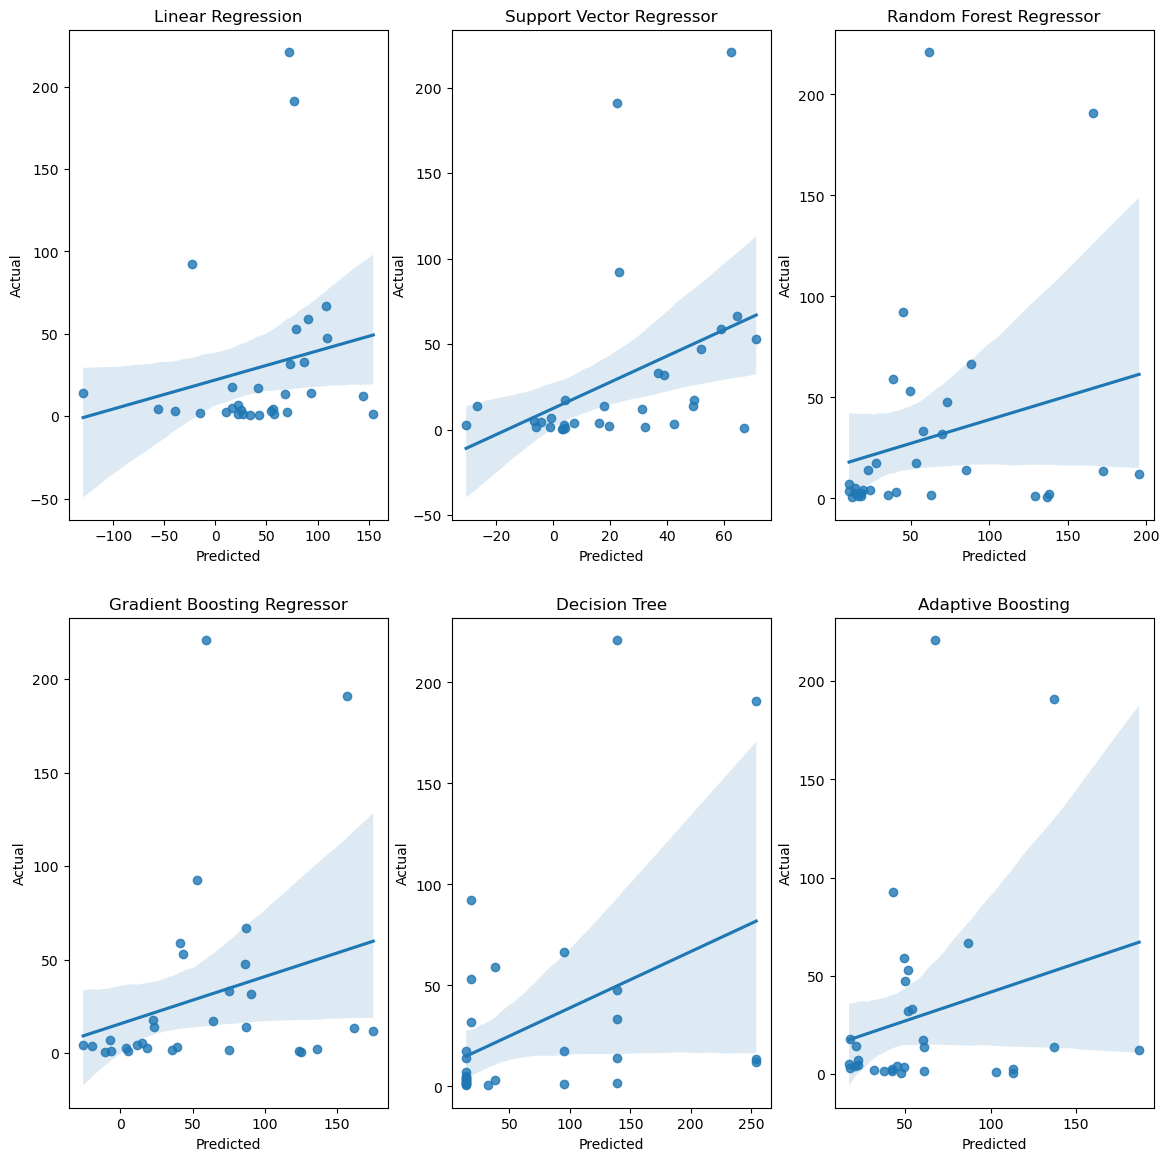

In [103]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(14,14))
ax = sns.regplot(x=predictions_1, y=y_test, scatter= True, fit_reg= True,ax=ax1)
ax.set(xlabel='Predicted',ylabel='Actual',title='Linear Regression')

ax = sns.regplot(x=predictions_2, y=y_test, scatter= True, fit_reg= True,ax=ax2)
ax.set(xlabel='Predicted',ylabel='Actual',title='Support Vector Regressor')

ax = sns.regplot(x=predictions_3, y=y_test, scatter= True, fit_reg= True, ax=ax3)
ax.set(xlabel='Predicted',ylabel='Actual',title='Random Forest Regressor')

ax = sns.regplot(x=predictions_4, y=y_test, scatter= True, fit_reg= True, ax=ax4)
ax.set(xlabel='Predicted',ylabel='Actual',title='Gradient Boosting Regressor')

ax = sns.regplot(x=predictions_5, y=y_test, scatter= True, fit_reg= True, ax=ax5)
ax.set(xlabel='Predicted',ylabel='Actual',title='Decision Tree')

ax = sns.regplot(x=predictions_6, y=y_test, scatter= True, fit_reg= True, ax=ax6)
ax.set(xlabel='Predicted',ylabel='Actual',title='Adaptive Boosting')

[Text(0, 0, 'C (%)'),
 Text(1, 0, 'H (%)'),
 Text(2, 0, 'N (%)'),
 Text(3, 0, 'O (%)'),
 Text(4, 0, 'T (°C)'),
 Text(5, 0, 'RT (min)'),
 Text(6, 0, 'HR (°C/min)')]

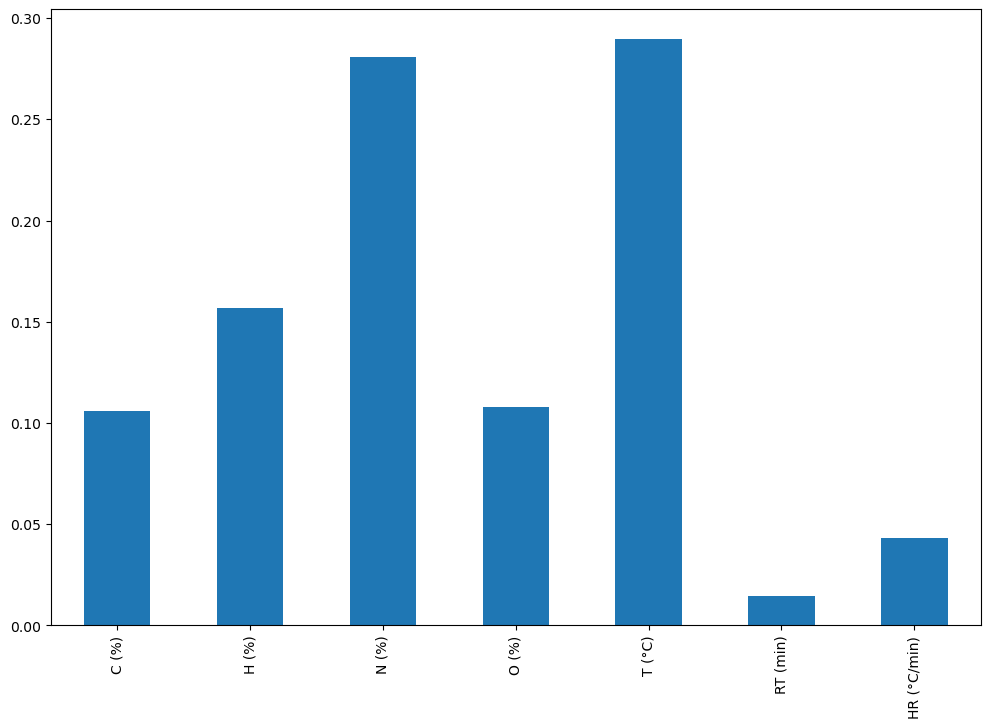

In [156]:
import matplotlib.pyplot as plt
%matplotlib inline
features =Model4.feature_importances_
frequencies = []
x_labels = []
Columns = list(X.columns)
for i,j in enumerate(features):
    frequencies.append(j)
    x_labels.append(Columns[i])

freq_series = pd.Series(frequencies)


# Plot the figure.
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_xticklabels(x_labels)

C (%) -> 0.10037225011835636
H (%) -> 0.20489969069851682
N (%) -> 0.22386757227995574
O (%) -> 0.11551223777435689
T (°C) -> 0.28344552556559977
RT (min) -> 0.009903146969401122
HR (°C/min) -> 0.061999576593813305


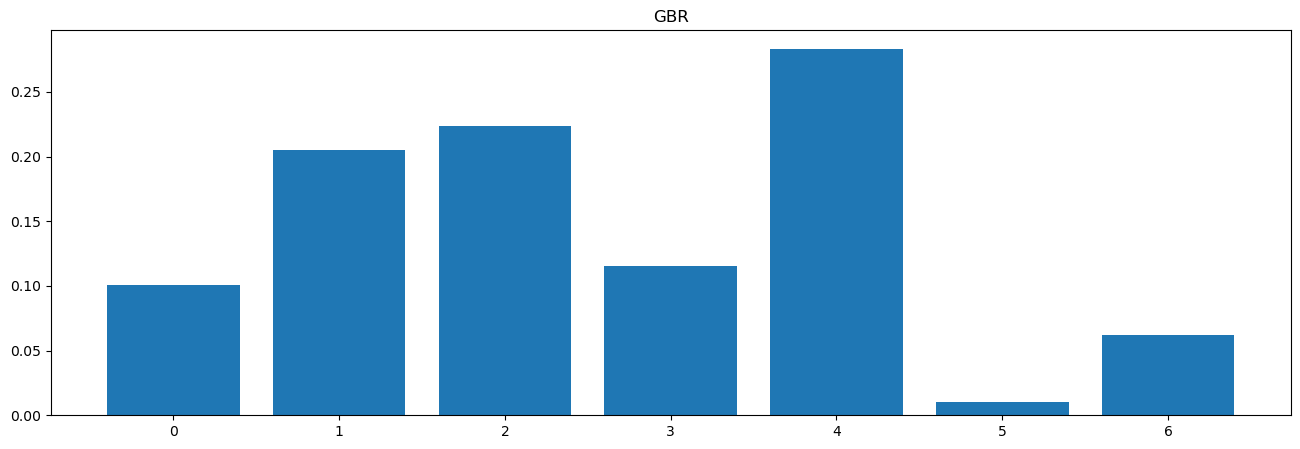

In [105]:
features =Model4.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="GBR")
plt.bar([x for x in range(len(features))],features)
plt.show()


In [136]:
df1=df.copy()
df1.dropna(subset=['HHV (MJ/KG)'],inplace=True)
X = df1.drop(['biomass type','C (%)', 'H (%)', 'N (%)', 'O (%)',"Yield-char (%)",'N-char (%)','SSA-char (m2/g)', 'HHV (MJ/KG)'],axis=1)
y = df1['HHV (MJ/KG)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions_1 = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_1),3))
print('end')

SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions_2 = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_2))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_2),3))
print('end')

Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions_3 = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_3))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_3),3))
print('end')

Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions_4 = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_4))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_4))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_4),3))
print('end')

Model3 = DecisionTreeRegressor( max_depth=100,
max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.10,
random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions_5 = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_5))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_5))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_5)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_5),3))
print('end')

Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions_6 = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_6))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_6))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_6)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_6),3))
print('end')

Mean absolute error (MAE): 3.9922922356633475
Mean square error (MSE): 21.153841041724533
Root mean square error (RMSE): 4.599330499292754
R-squared value of predictions: 0.41
end
Mean absolute error (MAE): 2.222390755937404
Mean square error (MSE): 13.348681735330219
Root mean square error (RMSE): 3.653584778724892
R-squared value of predictions: 0.628
end
Mean absolute error (MAE): 0.3041068510500451
Mean square error (MSE): 0.41266700406943824
Root mean square error (RMSE): 0.6423916282684872
R-squared value of predictions: 0.988
end
Mean absolute error (MAE): 0.07878655902389184
Mean square error (MSE): 0.04967686759784528
Root mean square error (RMSE): 0.22288308055535594
R-squared value of predictions: 0.999
end
Mean absolute error (MAE): 1.50761382700003
Mean square error (MSE): 10.573084656358406
Root mean square error (RMSE): 3.251628000918679
R-squared value of predictions: 0.705
end
Mean absolute error (MAE): 0.2858866243510778
Mean square error (MSE): 0.2473296371220267
Roo

In [137]:
df5=[predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6]

for i in df5:
    print(round(metrics.mean_absolute_error(y_test,i),2))
    print(round(metrics.mean_squared_error(y_test,i),2))
    print(round(np.sqrt(metrics.mean_squared_error(y_test,i)),2))
    print(round(metrics.r2_score(y_test,i),2))
    print('end')

3.99
21.15
4.6
0.41
end
2.22
13.35
3.65
0.63
end
0.3
0.41
0.64
0.99
end
0.08
0.05
0.22
1.0
end
1.51
10.57
3.25
0.7
end
0.29
0.25
0.5
0.99
end


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Adaptive Boosting')]

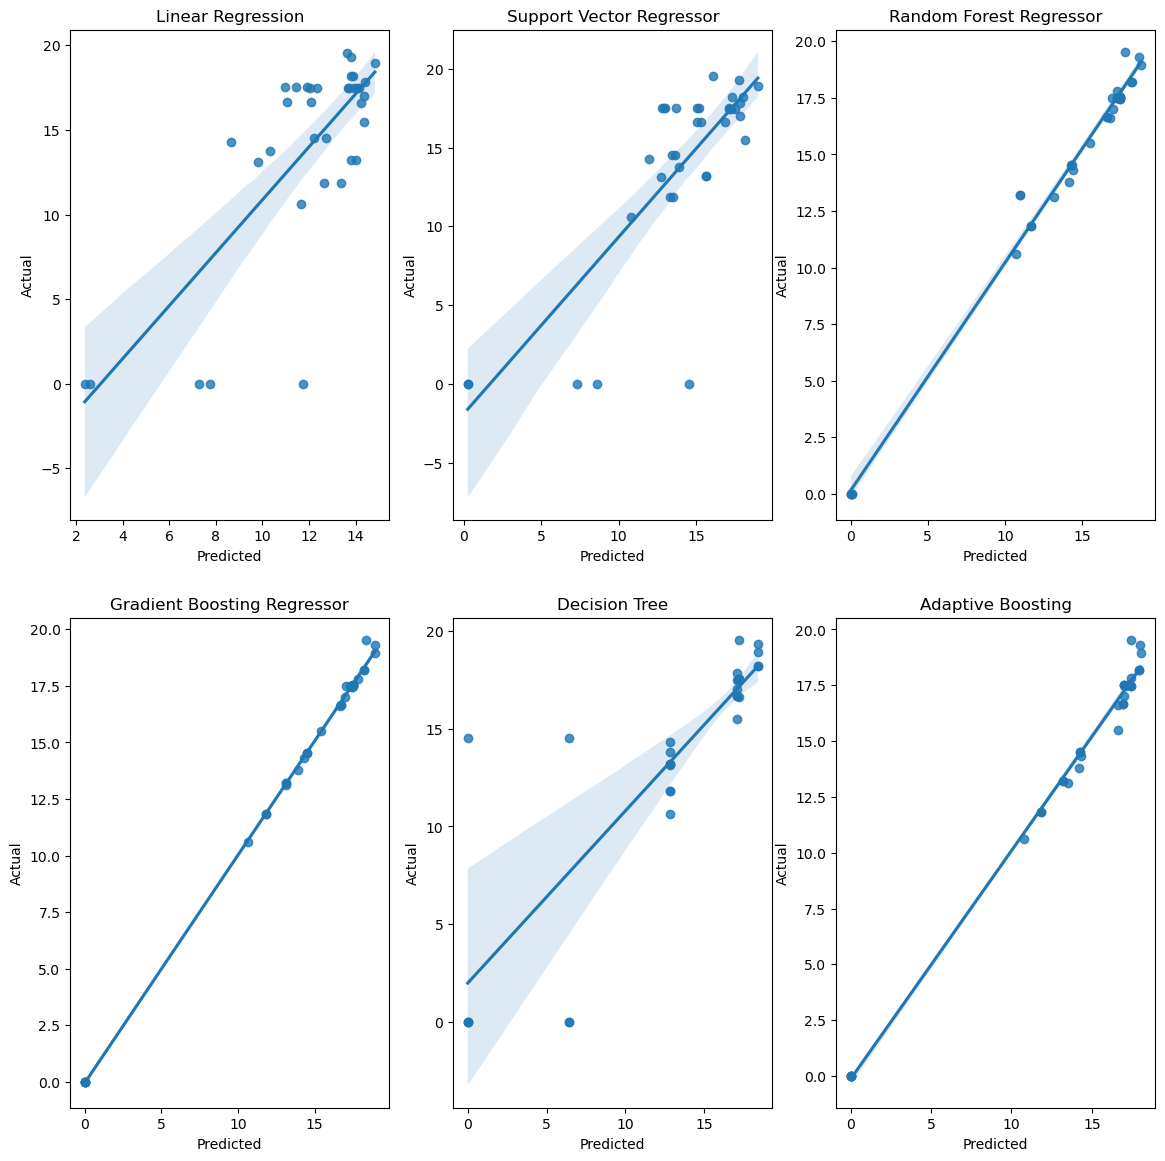

In [107]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(14,14))
ax = sns.regplot(x=predictions_1, y=y_test, scatter= True, fit_reg= True,ax=ax1)
ax.set(xlabel='Predicted',ylabel='Actual',title='Linear Regression')

ax = sns.regplot(x=predictions_2, y=y_test, scatter= True, fit_reg= True,ax=ax2)
ax.set(xlabel='Predicted',ylabel='Actual',title='Support Vector Regressor')

ax = sns.regplot(x=predictions_3, y=y_test, scatter= True, fit_reg= True, ax=ax3)
ax.set(xlabel='Predicted',ylabel='Actual',title='Random Forest Regressor')

ax = sns.regplot(x=predictions_4, y=y_test, scatter= True, fit_reg= True, ax=ax4)
ax.set(xlabel='Predicted',ylabel='Actual',title='Gradient Boosting Regressor')

ax = sns.regplot(x=predictions_5, y=y_test, scatter= True, fit_reg= True, ax=ax5)
ax.set(xlabel='Predicted',ylabel='Actual',title='Decision Tree')

ax = sns.regplot(x=predictions_6, y=y_test, scatter= True, fit_reg= True, ax=ax6)
ax.set(xlabel='Predicted',ylabel='Actual',title='Adaptive Boosting')

In [13]:
df1=df.copy()
df1.dropna(subset=['HHV (MJ/KG)'],inplace=True)
X = df1.drop(['biomass type','VM (%)', 'Ash (%)','FC (%)',"Yield-char (%)",'N-char (%)','SSA-char (m2/g)', 'HHV (MJ/KG)'],axis=1)
y = df1['HHV (MJ/KG)']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions_1 = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_1),3))


SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions_2 = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_2))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_2),3))

Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions_3 = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_3))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_3),3))

Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions_4 = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_4))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_4))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_4),3))

Model3 = DecisionTreeRegressor( max_depth=100,
max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.10,
random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions_5 = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_5))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_5))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_5)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_5),3))

Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions_6 = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_6))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_6))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_6)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions_6),3))

Mean absolute error (MAE): 4.706076177285384
Mean square error (MSE): 32.260593448704775
Root mean square error (RMSE): 5.679840970370981
R-squared value of predictions: 0.1
Mean absolute error (MAE): 3.736062455630667
Mean square error (MSE): 27.209741294989684
Root mean square error (RMSE): 5.216295744586352
R-squared value of predictions: 0.241
Mean absolute error (MAE): 1.917652879382195
Mean square error (MSE): 10.557347272224872
Root mean square error (RMSE): 3.2492071759469066
R-squared value of predictions: 0.705
Mean absolute error (MAE): 0.9989118362156254
Mean square error (MSE): 7.67508152772591
Root mean square error (RMSE): 2.7703937495825226
R-squared value of predictions: 0.786
Mean absolute error (MAE): 3.702584380079647
Mean square error (MSE): 31.501454673227872
Root mean square error (RMSE): 5.612615671255949
R-squared value of predictions: 0.121
Mean absolute error (MAE): 2.0450409447492826
Mean square error (MSE): 5.885505594176733
Root mean square error (RMSE): 2

In [139]:
df5=[predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6]

for i in df5:
    print(round(metrics.mean_absolute_error(y_test,i),2))
    print(round(metrics.mean_squared_error(y_test,i),2))
    print(round(np.sqrt(metrics.mean_squared_error(y_test,i)),2))
    print(round(metrics.r2_score(y_test,i),2))
    print('end')
    

4.71
32.26
5.68
0.1
end
3.74
27.21
5.22
0.24
end
1.92
10.56
3.25
0.71
end
1.06
8.38
2.9
0.77
end
3.7
31.5
5.61
0.12
end
1.98
9.0
3.0
0.75
end


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

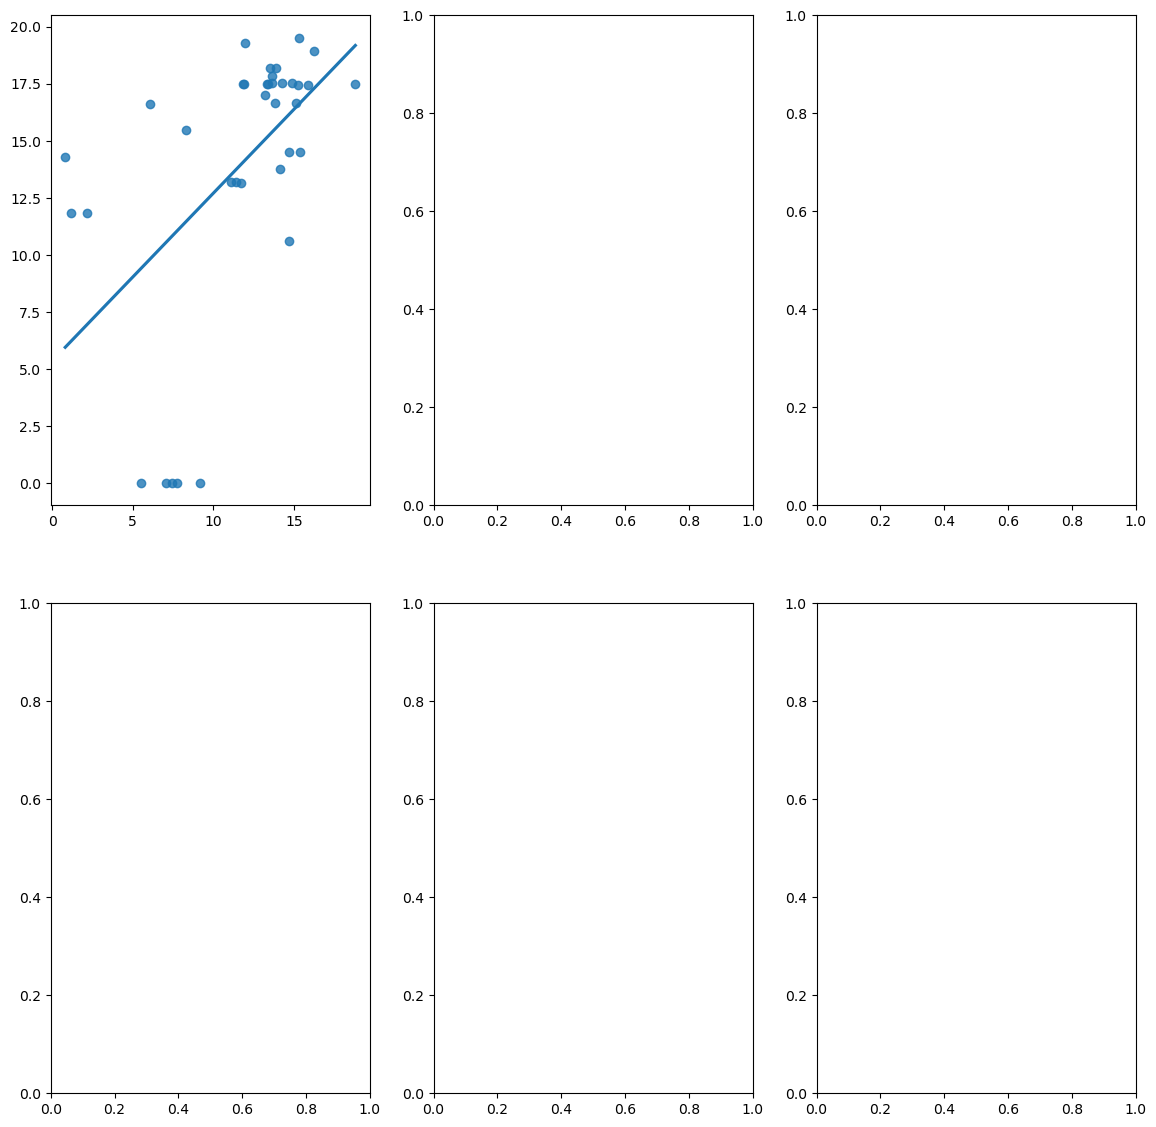

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(14,14))
ax = sns.regplot(x=predictions_1, y=y_test, scatter= True, fit_reg= True,ax=ax1)
ax.set(xlabel='Predicted',ylabel='Actual',title='Linear Regression')

ax = sns.regplot(x=predictions_2, y=y_test, scatter= True, fit_reg= True,ax=ax2)
ax.set(xlabel='Predicted',ylabel='Actual',title='Support Vector Regressor')

ax = sns.regplot(x=predictions_3, y=y_test, scatter= True, fit_reg= True, ax=ax3)
ax.set(xlabel='Predicted',ylabel='Actual',title='Random Forest Regressor')

ax = sns.regplot(x=predictions_4, y=y_test, scatter= True, fit_reg= True, ax=ax4)
ax.set(xlabel='Predicted',ylabel='Actual',title='Gradient Boosting Regressor')

ax = sns.regplot(x=predictions_5, y=y_test, scatter= True, fit_reg= True, ax=ax5)
ax.set(xlabel='Predicted',ylabel='Actual',title='Decision Tree')

ax = sns.regplot(x=predictions_6, y=y_test, scatter= True, fit_reg= True, ax=ax6)
ax.set(xlabel='Predicted',ylabel='Actual',title='Adaptive Boosting')

[Text(0, 0, 'C (%)'),
 Text(1, 0, 'H (%)'),
 Text(2, 0, 'N (%)'),
 Text(3, 0, 'O (%)'),
 Text(4, 0, 'T (°C)'),
 Text(5, 0, 'RT (min)'),
 Text(6, 0, 'HR (°C/min)')]

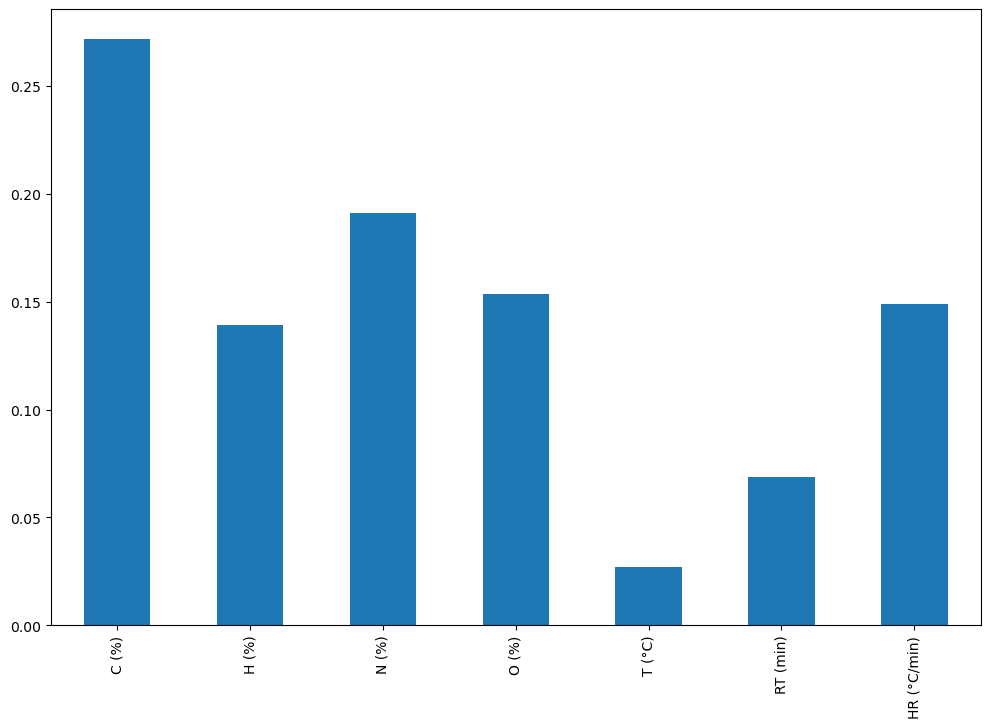

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
features =Model4.feature_importances_
frequencies = []
x_labels = []
Columns = list(X.columns)
for i,j in enumerate(features):
    frequencies.append(j)
    x_labels.append(Columns[i])

freq_series = pd.Series(frequencies)


# Plot the figure.
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_xticklabels(x_labels)